# METODOLOGIA BASEADA EM CIÊNCIA DE REDES PARA ANÁLISE DE COMUNIDADES EM REDES SOCIAIS COM GEOLOCALIZAÇÃO

## Autor: ERIC LEAL

### Detalhes do Projeto
Em desenvolvimento...



## Importando as bibliotecas

In [11]:
import seaborn as sns; sns.set_theme()
import GeosocialAlgorithms as ga
import AcessoryMethods as am
import matplotlib.pyplot as plt
import geopandas as gpd
import networkx as nx
import pandas as pd
import numpy as np
import random
import math
import json
import time
import utm
import csv
import os

from sklearn.metrics.cluster import adjusted_mutual_info_score as ami
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from tqdm.contrib.concurrent import thread_map
from matplotlib.colors import LogNorm
from tqdm import tqdm as tqdmBasic
from sklearn.cluster import KMeans
from pandas import json_normalize
from shapely import geometry

# import tweepy
# from dotenv import load_dotenv

## Configurando a API

In [2]:
# Load the .env file
# load_dotenv()

# # Get the keys from the .env file
# consumer_key = os.environ.get('TWITTER_API_KEY')
# consumer_secret = os.environ.get('TWITTER_API_KEY_SECRET')
# access_token = os.environ.get('TWITTER_ACCESS_TOKEN')
# access_token_secret = os.environ.get('TWITTER_ACCESS_TOKEN_SECRET')
# bearer_token = os.environ.get('TWITTER_BEARER_TOKEN')

# # Authenticate with the twitter API
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_token_secret)

# # Create the API object
# api = tweepy.API(auth, wait_on_rate_limit=True)

## Carregando dados caso existam

In [12]:
acessory = am.AcessoryMethods()

In [2]:
# Dicionario a ser preenchido com chaves sendo o author_id e os valores sendo o username
if os.path.exists(r'E://Dict_Author_Id_to_Username.json'):
    with open(r'E://Dict_Author_Id_to_Username.json', 'r') as fp:
        author_id_to_username = json.load(fp)
        print(f"Foram carregadas {len(author_id_to_username)} chaves do arquivo JSON")
else:
    author_id_to_username = {}

Foram carregadas 181528 chaves do arquivo JSON


In [3]:
df_mean = pd.read_csv(r"E:/DataFrameUsernameMeansMedians.csv", sep=";", header=0)
df_mean.head()

,username,mean_lat,mean_lon,median_lat,median_lon,mean_X,mean_Y,median_X,median_Y
0,Manuela_Lagoa,38.700000,-9.183333,38.700000,-9.183333,484058.020170,4.283502e+06,484058.020170,4.283502e+06
1,oblogdoedinho,38.725563,-9.150002,38.725563,-9.150002,486961.074436,4.286333e+06,486961.074864,4.286333e+06
2,noventaradio,38.862267,-9.065097,38.864860,-9.060729,494352.231645,4.301494e+06,494731.412762,4.301782e+06
3,object82,38.751381,-9.188555,38.716700,-9.156900,483615.659822,4.289205e+06,486359.738400,4.285351e+06
4,Itsmarsousa,38.650379,-9.074263,38.661370,-9.077440,493537.927984,4.277983e+06,493262.488755,4.279202e+06


In [4]:
dfTopAuthorsProjected = pd.read_csv("E://TopAuthorsProjected.csv")

In [5]:
with open(r'E:/dictMentions_locations.json', 'r') as f:
    dictMentions = json.load(f)

In [6]:
grafo_twitter = nx.read_graphml("D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_twitter.graphml")
grafo_twitter_conexo = nx.read_graphml("D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_twitter_conexo.graphml")

grafo_fluxo_secao = nx.read_graphml("D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_fluxo_secao.graphml")
grafo_fluxo_freguesia = nx.read_graphml("D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_fluxo_freguesia.graphml")
grafo_fluxo_municipio = nx.read_graphml("D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_fluxo_municipio.graphml")

grafo_regioes_secao = nx.read_graphml("D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_regioes_secao.graphml")  
grafo_regioes_freguesia = nx.read_graphml("D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_regioes_freguesia.graphml")
grafo_regioes_municipio = nx.read_graphml("D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_regioes_municipio.graphml")

In [7]:
grafo_twitter.number_of_nodes(), grafo_twitter.number_of_edges()

(196916, 142355)

In [8]:
gdf_wgs84_secao = gpd.read_file(r"C:\Users\Cliente\OneDrive\UNIRIO\TCC\GPK\Seccao_Area_de_Interesse.shp")
gdf_wgs84_freguesia = gpd.read_file(r"C:\Users\Cliente\OneDrive\UNIRIO\TCC\GPK\Freguesia_Area_de_Interesse.shp")
gdf_wgs84_municipio = gpd.read_file(r"C:\Users\Cliente\OneDrive\UNIRIO\TCC\GPK\Municipio_Area_de_Interesse.shp")

crs = "EPSG:4326"

gdf_wgs84_secao = gdf_wgs84_secao.to_crs(crs)
gdf_wgs84_freguesia = gdf_wgs84_freguesia.to_crs(crs)
gdf_wgs84_municipio = gdf_wgs84_municipio.to_crs(crs)

In [ ]:
gdf_users = gpd.read_file(r"E:\Usernames_Com_Coordenadas_Localidade.csv")
gdf_users['geometry'] = gdf_users.apply(lambda x: geometry.Point(x['median_lon'], x['median_lat']), axis=1)

In [71]:
grafo_twitter_com_coordenadas = nx.read_graphml("D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_twitter_com_coordenadas.graphml")

In [72]:
acessory.show_graph_metrics(grafo_twitter_com_coordenadas)

Nº de nós: 116087
Nº de links: 20035
Grau médio: 0.34517215536623397
Densidade: 1.486708799365272e-06


## Carregando métodos

In [73]:
def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

In [74]:
def load_jsonl(input_path) -> list:
    """
    Read list of objects from a JSON lines file.
    """
    data = []
    with open(input_path, 'r', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line.rstrip('\n|\r')))
    print('Loaded {} records from {}'.format(len(data), input_path))
    return data

In [75]:
def dataframe_standartization(data_frame: pd.DataFrame, columns: list = []) -> pd.DataFrame:
    data_frame.drop(columns=columns, inplace=True)
    data_frame = data_frame.fillna(0)
    
    dict_coord_by_user = {}

    for index, row in tqdmBasic(data_frame.iterrows(), total=data_frame.shape[0]):
        if row['username'] not in dict_coord_by_user:
            dict_coord_by_user[row['username']] = {
                'lat': [],
                'lon': []
            }        
            
        dict_coord_by_user[row['username']]['lat'].append(row['lat'])
        dict_coord_by_user[row['username']]['lon'].append(row['lon'])
        
    df_mean = pd.DataFrame(columns=["username", "mean_lat", "mean_lon", "median_lat", "median_lon"])

    for key in tqdmBasic(dict_coord_by_user.keys()):
        df_mean = df_mean._append({
            "username": key,
            "mean_lat": np.mean(dict_coord_by_user[key]['lat']),
            "mean_lon": np.mean(dict_coord_by_user[key]['lon']),
            "median_lat": np.median(dict_coord_by_user[key]['lat']),
            "median_lon": np.median(dict_coord_by_user[key]['lon'])
        }, ignore_index=True)
        
    return df_mean

In [76]:
def gera_dict_mentions_by_user(data_frame: pd.DataFrame, data_frame2:pd.DataFrame = None,  mentions_unicas = True) -> dict:
    if data_frame2 is not None:
        mentions_usuario = {}
        
        for index, row in tqdmBasic(data_frame2.iterrows(), total=data_frame2.shape[0]):
            if row['username'] not in mentions_usuario:
                mentions_usuario[row['username']] = [row_base[0]['username'] for row_base in data_frame[data_frame['username'] == row['username']]['entities_mentions'].tolist() 
                                                     if row_base is not None]    
    else:
        data_editado = data_frame['entities_mentions']
        data_editado.dropna(inplace=True)
        # dataEditado.reset_index(drop=True, inplace=True)
        data_editado = data_editado.to_frame()
        
        mentions_usuario = {}

        # Percorrendo teste1 e adicionando os usernames no dicionário usando o id do usuário como chave
            
        for mention in tqdmBasic(data_editado.itertuples(), total=data_editado.shape[0]):
            usuarios_mencionados = []
            
            coluna = 'author_id' #'username' if data_frame['username'].at[mention.Index] != '' else 'author_id'
            
            if data_frame[coluna].at[mention.Index] not in mentions_usuario:
                mentions_usuario[data_frame[coluna].at[mention.Index]] = []
                
            for usuario in mention[1]:
                usuarios_mencionados.append(usuario['username'])
                mentions_usuario[data_frame[coluna].at[mention.Index]].extend(usuarios_mencionados)
        
    if mentions_unicas:
        mentions_usuario = {k: list(dict.fromkeys(v)) for k, target in mentions_usuario.items()}
        
    return mentions_usuario

In [77]:
def gera_dict_link_tweets(data_frame) -> list:
    data_editado = data_frame['entities_urls']
    data_editado.dropna(inplace=True)
    # dataEditado.reset_index(drop=True, inplace=True)
    data_editado = data_editado.to_frame()
    
    links_tweets = {}

    # Percorrendo teste1 e adicionando os usernames no dicionário usando o id do usuário como chave
        
    contador = 1
    for link in data_editado.itertuples():
        print(f"Link {contador} de {data_editado.shape[0]}")
        
        links_tweet = []
        if data_frame['author_id'].at[link.Index] not in links_tweets:
            links_tweets[data_frame['author_id'].at[link.Index]] = []
            
        for link_tweet in link[1]:
            links_tweet.append(link_tweet['expanded_url'])
            links_tweets[data_frame['author_id'].at[link.Index]].extend(links_tweet)
        contador += 1
        
    return links_tweets

In [78]:
def return_media_dict_listas(dict : dict) -> float:
    soma = 0
    for key in dict:
        soma += len(dict[key])
    return soma/len(dict)

In [79]:
def get_username(author_id: str):
    """Recupera o username do usuário a partir do author_id e atualiza o dicionário author_id_to_username

    Args:
        author_id: O id do usuário 
    """
    if author_id in author_id_to_username.keys():
        return
    
    author_id_to_username[author_id] = ''
    try:
        user = api.get_user(user_id=author_id)  
        author_id_to_username[author_id] = user.screen_name
    except:
        pass

In [80]:
def returnDataFrameWithUsernames(dataFrame : pd.DataFrame) -> pd.DataFrame:      
    dataFrame['username'] = ''
    
    thread_map(get_username, [id for id in dataFrame['author_id']], max_workers=16, total=dataFrame.shape[0])
        
    for index, row in dataFrame.iterrows():
        dataFrame['username'].at[index] = author_id_to_username[row['author_id']]
    
    return dataFrame

In [81]:
def degree_histogram_directed(G, in_degree=False, out_degree=False):
    """Return a list of the frequency of each degree value.

    Parameters
    ----------
    G : Networkx graph
       A graph
    in_degree : bool
    out_degree : bool

    Returns
    -------
    hist : list
       A list of frequencies of degrees.
       The degree values are the index in the list.

    Notes
    -----
    Note: the bins are width one, hence len(list) can be large
    (Order(number_of_edges))
    """
    nodes = G.nodes()
    if in_degree:
        in_degree = dict(G.in_degree())
        degseq = [in_degree.get(k, 0) for k in nodes]
    elif out_degree:
        out_degree = dict(G.out_degree())
        degseq = [out_degree.get(k, 0) for k in nodes]
    else:
        degseq = [v for k, v in G.degree()]

    print(degseq)

    dmax = max(degseq) + 1
    freq = [0 for d in range(dmax)]
    for d in degseq:
        freq[d] += 1

    # Normalize the frequency to go from 0 to 1
    total = sum(freq)
    normalized_freq = [f / total for f in freq]

    # Make the histogram accumulative from highest to lowest
    accumulative_freq = [sum(normalized_freq[i:]) for i in range(len(normalized_freq))]
    return accumulative_freq

In [82]:
def processRawData(data : dict | list[dict]) -> pd.DataFrame:
    data_frame = json_normalize(data,record_path = ['data'], sep = '_', errors ='ignore')
        
    data_frame['lat'] = data_frame['geo_coordinates_coordinates'].str.get(1)
    data_frame['lon'] = data_frame['geo_coordinates_coordinates'].str.get(0)

    #cleaning fields that will not be used
    try:
        # del data_frame['entities_mentions']
        del data_frame['context_annotations']
        # del data_frame['entities_urls']
        # del data_frame['entities_cashtags']
        del data_frame['withheld_copyright']
        del data_frame['withheld_country_codes']
        del data_frame['withheld_scope']
    except:
        pass
    
    return data_frame

In [83]:
def process_file(file: str) -> pd.DataFrame:
    """Processa um arquivo JSONL e retorna um dataframe

    Args:
        file (str): Caminho do arquivo JSONL

    Returns:
        pd.DataFrame: Dataframe com os dados do arquivo JSONL
    """
    print(f"Processando arquivo {file}")
    df = json_normalize(load_jsonl(file), sep='_', errors='ignore')
    return df

In [84]:
def convert_to_utm(df: pd.DataFrame, columnLat: str = "latitude", columnLon: str = "longitude", outColumnX: str = "x", outColumnY: str = "y") -> pd.DataFrame:
  """Converte as coordenadas de latitude e longitude para UTM zona 29.

  Args:
      df (pd.DataFrame): Dataframe com as coordenadas de latitude e longitude.
      columnLat (str, optional): Coluna que contém a latitude. Defaults to "latitude".
      columnLon (str, optional): Coluna que contém a longitude. Defaults to "longitude".
      outColumnX (str, optional): Coluna saída em UTM para o eixo X. Defaults to "x".
      outColumnY (str, optional): Coluna saída em UTM para o eixo Y. Defaults to "y".

  Returns:
      pd.DataFrame: Dataframe atualizado com as coordendas em UTM.
  """
  # Obtém as coordenadas de latitude e longitude.

  lat = df[columnLat].values
  lon = df[columnLon].values

  # Converte para UTM.

  easting, northing, zone_number, zone_letter = utm.from_latlon(lat, lon)

  # Adiciona as colunas `mean_X` e `mean_Y` ao dataframe.

  df[outColumnX] = easting
  df[outColumnY] = northing

  return df

In [85]:
def get_expanded_urls(row):
    """
    Retorna uma lista com as URLs expandidas do tweet.

    Args:
        row: Uma linha do dataframe.

    Returns:
        Uma lista com as URLs expandidas do tweet.
    """

    if row['entities_urls']:
        expanded_urls = [url['expanded_url'] for url in row['entities_urls']]
    else:
        expanded_urls = []
    return expanded_urls

In [86]:
def associateNodes(row):
    G = nx.DiGraph()
    vertex = row['username'] if row['username'] != '' else row['author_id']
    
    if vertex not in G.nodes():
        G.add_node(vertex)
        
    if row['entities_mentions']:
        for mention in row['entities_mentions']:
            mention_username = mention['username']
            if mention_username not in G.nodes():
                G.add_node(mention_username)
            G.add_edge(vertex, mention_username)
    
    return G

In [87]:
def calculate_distance_geographic(lat1, lon1, lat2, lon2):
    x1, y1, _, _ = utm.from_latlon(lat1, lon1)
    x2, y2, _, _ = utm.from_latlon(lat2, lon2)

    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

In [88]:
def calculateDistance(xP1: float, yP1: float, xP2: float, yP2: float):
    P1 = [xP1, yP1]
    P2 = [xP2, yP2]
    
    return math.dist(P1, P2)

In [89]:
def calculateDistances(graph, generalizationLimit = None):
  nodes_with_median = [node for node in graph.nodes if "median_X" in graph.nodes[node]]
  
  print(f"Existem {len(nodes_with_median)} nós com mediana.")
  
  distances = {}
  
  for node in tqdmBasic(nodes_with_median):
    for other_node in nodes_with_median:
        if node == other_node:
            continue
        
        # print(f"Calculando distância entre {node} e {other_node}")
        
        distance = calculateDistance(
            graph.nodes[node]["median_X"], graph.nodes[node]["median_Y"], graph.nodes[other_node]["median_X"], graph.nodes[other_node]["median_Y"]
        )
        if generalizationLimit is not None:
            generaralized_distance = int(distance//generalizationLimit)
            if generaralized_distance not in distances.keys():
                distances[generaralized_distance] = 1
            else:
                distances[generaralized_distance] += 1
        else:
            if distance not in distances.keys():
                distances[distance] = 1
            else:
                distances[distance] += 1
            
        # distancesFromNode[node].append(distance)
  
  
  return distances

In [90]:
def plotScatterEmpyricalComplementarDistribution(distances, output_path: str = 'E://', output_file_name: str = 'empyrical_complementar_distribution.png', show: bool = False, log: bool = False):
    """Plota o gráfico de dispersão da distribuição empírica complementar.

    Args:
        distances (list): Lista com as distâncias.
        output_path (str): Caminho de saída do arquivo.
        output_file_name (str): Nome do arquivo de saída.
        show (bool): Se o gráfico deve ser exibido.
    """    
    # sort the distances

    # calculate the probability of each distance
    if isinstance(distances, dict):
        keys_in_order = sorted(distances.keys())
        length_distances = sum(distances.values())
        dist = 1
        prob = []
        print(f"keys_in_order: {keys_in_order}")
        print(f"length_distances: {length_distances}")
        
        distances_list = [key for key, value in distances.items() for _ in tqdmBasic(range(value))]
        n = len(distances_list)
        prob = [1 - (i+1)/n for i in tqdmBasic(range(0,n))]
                    
        distances = list(distances.keys())
        
    else:
        distances.sort()
        if log == True:
            prob = [np.log10(1 - (i/len(distances))) for i in tqdmBasic(range(len(distances)), desc="Calculando probabilidade")]
        else:
            prob = [1 - (i/len(distances)) for i in tqdmBasic(range(len(distances)))]
            
    print(type(prob))

    # plot the scatter graph
    plt.figure(figsize=(180, 120))
    plt.scatter(distances, prob)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel("Distância")
    plt.ylabel("Probabilidade")
    plt.savefig(f"{output_path}{output_file_name}", dpi=300, bbox_inches='tight')
    
    if show:
        plt.show()
       

In [91]:
def generate_colors(n):
    cmap = plt.colormaps['hsv']  # Use o colormap 'hsv' para cores distintas
    colors = cmap(np.linspace(0, 1, n+1))  # Gera n cores distintas
    return colors

In [92]:
def show_geo_modularity(grafo, D, d, centroid):
    for node in grafo.nodes():
        if 'median_lat' not in grafo.nodes[node]:
            continue
        
        coordinates = (float(grafo.nodes[node]["median_lat"]), float(grafo.nodes[node]["median_lon"]))
        
        dispersao = calculate_distance_geographic(coordinates[0], coordinates[1], centroid[0], centroid[1])
        
        f_x = (math.log(1/dispersao) + math.log(D) + math.log(d)) / (math.log(D) - math.log(d))
        
        if f_x != 0:
            try:
                f_x = math.log(f_x)
            except ValueError:
                print(f"dist: {dispersao}, D: {D}, d: {d}")
        # else:
        #     print(f"Node: {node}, Distance: {dispersao}, (f(x): {f_x}")
        
        print(f"Node: {node}, Distance: {dispersao}, log(f(x)): {f_x}")

In [93]:
def convert_geo_to_utm(graph: nx.graph, column_lat: str = 'median_lat', column_lon: str = 'median_lon'):
    for node in graph.nodes():
        latitute = float(graph.nodes[node][column_lat])
        longitude = float(graph.nodes[node][column_lon])
        
        easting, northing, _, _ = utm.from_latlon(latitute, longitude)
        graph.nodes[node]['median_X'] = easting
        graph.nodes[node]['median_Y'] = northing
        
    return graph

In [94]:
def calculate_ward_dispersion(grafo: nx.graph, comunidades: list, latitude: str = 'latitude', longitude: str = 'longitude'):
    
    # comm = set(comunidades)
    coords = np.array([[float(grafo.nodes[node][longitude]), float(grafo.nodes[node][latitude])] for node in comunidades])
    
    def community_dispersion(coords: np.array):
        centroid = np.mean(coords, axis=0)
        
        return np.sum((coords - centroid) ** 2)
        
    return sum(map(community_dispersion, coords))

In [95]:
def plot_colored_communities(latitude, longitude, grafo, grafo_geo, comunities_geo, comunities_original, with_labels=False, use_geolocation=True):
    if use_geolocation:
        pos = {node: (grafo.nodes[node][latitude], grafo.nodes[node][longitude]) for node in grafo.nodes()}
    else:
        pos = nx.spring_layout(grafo)
        
    pos_geo = {node: (grafo_geo.nodes[node][latitude], grafo_geo.nodes[node][longitude]) for node in grafo_geo.nodes()}
    
    colors_original = generate_colors(len(comunities_original))
    colors_geo = generate_colors(len(comunities_geo))
    
    node_colors_original = {}
    node_colors_geo = {}
    
    for i, com in enumerate(comunities_original):
        for node in com:
            node_colors_original[node] = colors_original[i]
            
    for i, com in enumerate(comunities_geo):
        for node in com:
            node_colors_geo[node] = colors_geo[i]    

    # Plot the graph with colored nodes based on communities
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.subplot(1, 2, 1)
    nx.draw_networkx(grafo, pos=pos, node_color=[node_colors_original[node] for node in grafo.nodes()], node_size=100, font_size=10, with_labels=with_labels)
    plt.axis('on')
    plt.title("Comunidades do grafo social")

    plt.subplot(1, 2, 2)
    nx.draw_networkx(grafo_geo, pos=pos_geo, node_color=[node_colors_geo[node] for node in grafo_geo.nodes()], node_size=100, font_size=10, with_labels=with_labels)
    plt.axis('on')
    plt.title("Comunidades do grafo geográfico")

    plt.show()

In [96]:
def jaccard_similarity(community1, community2):
    """Calcula a similaridade de Jaccard entre duas comunidades.

    Args:
        community1 (list): A primeira comunidade.
        community2 (list): A segunda comunidade.

    Returns:
        float: O índice de similaridade de Jaccard.
        
    Examples:
        >>> community1 = {1, 2, 3}
        >>> community2 = {2, 3, 4}
        >>> jaccard_similarity(community1, community2)
        0.5
    """
    intersection = len(community1.intersection(community2))
    union = len(community1.union(community2))
    
    return intersection / union

In [97]:
def assign_labels(partition, all_elements):
    """Define os rótulos de cada elemento com base na partição.

    Args:
        partition (list): A partição.
        all_elements (list): Todos os elementos.
        
    Returns:
        list: Uma lista com os rótulos de cada elemento.
        
    Examples:
        >>> partition = [{1, 2, 3}, {4, 5, 6}]
        >>> all_elements = [1, 2, 3, 4, 5, 6]
        >>> assign_labels(partition, all_elements)
        [0, 0, 0, 1, 1, 1]
    """
    labels = {}
    for cluster_id, cluster in enumerate(partition):
        for element in cluster:
            labels[element] = cluster_id
    return [labels[element] for element in all_elements]

### Métodos de geração de grafos

In [98]:
def generate_flow_graph(graph: nx.Graph, gdf: gpd.GeoDataFrame, column: str = 'geometry'):
    """Gera um grafo de fluxo a partir de um grafo existente e um GeoDataFrame com as regiões de interesse.

    Args:
        graph (nx.graph): Grafo base de onde será gerado o grafo de fluxo.
        gdf (gpd.GeoDataFrame): GeoDataFrame com os dados geográficos das regiões de interesse.
        column (str, optional): coluna alvo com o código de interesse. Defaults to 'geometry'.
    
    """
    
    grafo_fluxo = nx.DiGraph()
    no_sem_regiao = []
    
    for source, target in tqdmBasic(graph.edges(), total=graph.number_of_edges()):
        if source in no_sem_regiao and target in no_sem_regiao:
            continue
        
        u = graph.nodes[source]
        v = graph.nodes[target]
        
        try:
            u['median_lat']
        except:
            no_sem_regiao.append(source)
            continue
        
        try:
            v['median_lat']
        except:
            no_sem_regiao.append(target)
            continue
        
        u_region = gdf[gdf.contains(geometry.Point(float(u['median_lon']), float(u['median_lat'])))][column]
        v_region = gdf[gdf.contains(geometry.Point(float(v['median_lon']), float(v['median_lat'])))][column]
                
        if u_region.empty:
            no_sem_regiao.append(source)
            continue
        
        if v_region.empty:
            no_sem_regiao.append(target)
            continue
        
        if u_region.index[0] == v_region.index[0]:
            continue        
        
        if grafo_fluxo.has_edge(u_region.values[0], v_region.values[0]):
            grafo_fluxo[u_region.values[0]][v_region.values[0]]['weight'] += 1
        else:
            grafo_fluxo.add_edge(u_region.values[0], v_region.values[0], weight=1)
        
        # if (u_region.index[0], v_region.index[0]) not in grafo_fluxo.edges():
        #     grafo_fluxo.add_edge(u_region.index[0], v_region.index[0], weight=1)
        # else:
        #     grafo_fluxo[u_region.index[0]][v_region.index[0]]['weight'] += 1        
    
    return grafo_fluxo, no_sem_regiao

In [99]:
def generate_graph_from_gdf(gdf: gpd.GeoDataFrame, column: str = 'geometry') -> nx.Graph:
    """Gera um grafo a partir de um GeoDataFrame.

    Args:
        gdf (gpd.GeoDataFrame): GeoDataFrame com os dados.
        column (str, optional): Nome da coluna de referência. Defaults to 'geometry'.

    Returns:
        nx.Graph: Grafo gerado.
    """
    G = nx.Graph()

    for index, row in tqdmBasic(gdf.iterrows(), total=gdf.shape[0]):
        vertex = row[column]
        adjacent_regions = gdf[gdf.geometry.touches(row['geometry'])][column]
        
        for adjacent_region in adjacent_regions:
            G.add_edge(vertex, adjacent_region)
            
    return G

In [100]:
def generate_subgraph(graph, porcentage=0.9):
    """Gera um subgrafo a partir de um grafo.

    Args:
        graph (nx.Graph): Grafo base.
        porcentage (float, optional): Porcentagem do tamanho do grafo original. Defaults to 0.9.

    Returns:
        _type_: Subgrafo gerado.
    """
    directed = nx.is_directed(graph)
    
    components = list(nx.connected_components(graph)) if not directed else list(nx.weakly_connected_components(graph))
    
    components.sort(key=len, reverse=True)
    
    min_nodes = int(graph.number_of_nodes() * porcentage)
    
    subgraph = nx.Graph() if not directed else nx.DiGraph()
    
    for component in components:
        subgraph.add_nodes_from(component)
        subgraph.add_edges_from(graph.subgraph(component).edges())
        
        if len(subgraph) >= min_nodes:
            break
    
    for node in subgraph.nodes():
        subgraph.nodes[node].update(graph.nodes[node])
        
    return subgraph

### Métodos de cálculos com a rede

In [101]:
def show_graph_metrics(graph):
    degrees = []

    for node in graph.nodes():
        degrees.append(nx.degree(graph, node))
        
    print(f"Nº de nós: {graph.number_of_nodes()}")
    print(f"Nº de links: {graph.number_of_edges()}")
    print(f"Grau médio: {np.mean(degrees)}")
    print(f"Densidade: {nx.density(graph)}")
    # print(f"Cluster global: {nx.transitivity(graph)}")
    # print(f"Cluster médio: {nx.average_clustering(graph)}")

In [102]:
def return_graph_metrics(graph):
    degrees = []

    for node in graph.nodes():
        degrees.append(nx.degree(graph, node))
        
    return {
        "numero_nos": graph.number_of_nodes(),
        "numero_links": graph.number_of_edges(),
        "grau_medio": np.mean(degrees),
        "densidade": nx.density(graph)
    }

In [103]:
def calculate_geostatistics(graph: nx.graph = None, df: pd.DataFrame = None, column: str = 'comunidade') -> dict:
    """Calcula as estatísticas geográficas de um grafo.

    Args:
        graph (nx.graph): Grafo a ser analisado.
        

    Returns:
        dict: Dicionário com as estatísticas calculadas.
        
    Raises:
        ValueError: Se não for fornecido um grafo ou um dataframe.
    """
    stats = {}
    
    if graph is not None:
        for node in tqdmBasic(graph.nodes(), total=graph.number_of_nodes()):
            community = graph.nodes[node][column]
            if community not in stats.keys():
                stats[community] = {
                    'x_points': [],
                    'y_points': [],
                    'x_mean': 0.0,
                    'y_mean': 0.0,
                    'mean_distance_to_center': 0.0,
                    'standard_deviation': 0.0,
                }
                
            if 'median_X' not in graph.nodes[node]:
                continue
            
            x = float(graph.nodes[node]['median_X'])
            y = float(graph.nodes[node]['median_Y'])
            
            stats[community]['x_points'].append(x)
            stats[community]['y_points'].append(y)
            
            
    elif df is not None:
        for index, row in tqdmBasic(df.iterrows(), total=df.shape[0]):
            community = row[column]
            if community not in stats.keys():
                stats[community] = {
                    'x_points': [],
                    'y_points': [],
                    'x_mean': 0.0,
                    'y_mean': 0.0,
                    'mean_distance_to_center': 0.0,
                    'standard_deviation': 0.0,
                }
                
            if 'median_X' not in row:
                continue
            
            x = float(row['median_X'])
            y = float(row['median_Y'])
            
            stats[community]['x_points'].append(x)
            stats[community]['y_points'].append(y)
    else:
        raise ValueError("You must provide a graph or a dataframe.")        
        
    for community in stats.keys():
        x_mean = np.mean(stats[community]['x_points'])
        y_mean = np.mean(stats[community]['y_points'])
        
        stats[community]['x_mean'] = x_mean
        stats[community]['y_mean'] = y_mean
        
        distances = [math.dist([x_mean, y_mean], [x, y]) for x, y in zip(stats[community]['x_points'], stats[community]['y_points'])]
        mean_distance_to_center = np.mean(distances)
        standart_deviation = np.std(distances)
        
        stats[community]['mean_distance_to_center'] = mean_distance_to_center
        stats[community]['standard_deviation'] = standart_deviation        
    
    return stats

In [104]:
def return_community_detection_duration(graph: nx.Graph, algorithm: str = 'louvain'):
    """Calcula o tempo de execução de um algoritmo de detecção de comunidades.

    Args:
        graph (nx.Graph): Grafo a ser analisado.
        algorithm (str, optional): Algoritmo de detecção de comunidades. Defaults to 'louvain'.

    Returns:
        float: Tempo de execução do algoritmo.
        Any: Partição gerada.
        float: Modularidade da partição.       
        
    Raises:
        ValueError: Se o algoritmo não for implementado.
        
    Examples:
        >>> return_community_detection_duration(grafo_twitter, 'louvain')
        0.0001, {0: [1, 2, 3], 1: [4, 5, 6]}, 0.5
        
    """
    start = time.time()
    
    if algorithm == 'louvain':
        partition = nx.community.louvain_communities(graph)
        modularity = nx.community.modularity(graph, partition)
    elif algorithm == 'greedy':
        partition = nx.community.greedy_modularity_communities(graph)
        modularity = nx.community.modularity(graph, partition)
    elif algorithm == 'edge_betweeness':
        sets = random.randint(2, len(graph))        
        partition = nx.community.edge_betweenness_partition(graph, sets)  
        modularity = nx.community.modularity(graph, partition)
    elif algorithm == 'girvan_newman':
        comunidades = list(nx.community.girvan_newman(graph))
        partition = comunidades[0]
        modularity = nx.community.modularity(graph, partition)
        
        for i in range(1, len(comunidades)):
            partition_partial = comunidades[i]
            modularity_partial = nx.community.modularity(graph, partition_partial)
            
            if np.abs(modularity_partial) > np.abs(modularity):
                partition = partition_partial
                modularity = modularity_partial
    else:
        raise ValueError("Método não implementado.")
        
    end = time.time()
    
    return end - start, partition, modularity

In [105]:
def random_subgraph_by_porcentage(graph: nx.DiGraph, porcentage: float = 0.1, connected_only: bool = False):
    """Gera um subgrafo aleatório de um grafo.

    Args:
        graph (nx.Graph): Grafo base.
        porcentage (float, optional): Porcentagem de subgrafo. Defaults to 0.1.
    """
    graph_return = nx.DiGraph()
    
    edges = random.sample(list(graph.edges()), int(graph.number_of_edges()*porcentage))
    graph_return.add_edges_from(edges)
    
    for node in graph_return.nodes():
        graph_return.nodes[node].update(graph.nodes[node])
        
    if connected_only:
        components = nx.weakly_connected_components(graph_return)
        biggest_component = max(components, key=len)
        connected_graph = graph_return.subgraph(biggest_component)
        return connected_graph
    
    return graph_return

In [106]:
def compute_and_export_the_data_from_subgraphs(graph, output_path: str = 'E://', output_file_name: str = 'subgraph_data.csv', columns: list = ['Nós', 'Links'], porcentage: float = 0.1):

    output_file = os.path.join(output_path, output_file_name)

    try:
        df_performance = pd.read_csv(output_file, encoding='utf-8')
    except:
        df_performance = pd.DataFrame(columns=columns)
        
    tempo_louvain, comunidades_louvain, modularidade_louvain = return_community_detection_duration(graph, 'louvain')
    tempo_greedy, comunidades_greedy, modularidade_greedy = return_community_detection_duration(graph, 'greedy')
    # tempo_edge_betweeness = return_community_detection_duration(graph, 'edge_betweeness')    
    tempo_girvan_newman, comunidades_girvan_newman, modularidade_girvan_newman = return_community_detection_duration(graph, 'girvan_newman')

    df_performance = df_performance._append({
        "Porcentagem de Arestas": porcentage,
        "Nós": graph.number_of_nodes(),
        "Links": graph.number_of_edges(),
        "Grau Médio": np.mean([graph.degree(node) for node in graph.nodes()]),
        "Densidade": nx.density(graph),
        "Cluster Global": nx.transitivity(graph),
        "Cluster Médio": nx.average_clustering(graph),
        "Tempo Louvain": tempo_louvain,
        "N° Comunidades Louvain": len(comunidades_louvain),
        "Modularidade Louvain": modularidade_louvain,
        "Tempo Greedy": tempo_greedy,
        "N° Comunidades Greedy": len(comunidades_greedy),
        "Modularidade Greedy": modularidade_greedy,
        # "Tempo Edge Betweeness": tempo_edge_betweeness,
        "Tempo Girvan-Newman": tempo_girvan_newman,
        "N° Comunidades Girvan-Newman": len(comunidades_girvan_newman),
        "Modularidade Girvan-Newman": modularidade_girvan_newman
    }, ignore_index=True)

    df_performance.to_csv(output_file, index=False, encoding='utf-8')  

In [107]:
def merge_duplicate_nodes(graph: nx.Graph) -> tuple:
    """Merge duplicate nodes in a graph.

    Args:
        graph (nx.Graph): Graph to be processed.

    Raises:
        KeyError: If the graph does not have a 'coords' attribute in the nodes.
        
    Returns:
        tuple: Tupla contendo:
            graph (nx.Graph): Graph with merged nodes.
            unique_coords (dict): Dictionary with the unique coordinates.
        
    Examples:
        >>> graph, unique_coords = merge_duplicate_nodes(graph)
    """
    
    unique_coords = {}

    for node in list(graph.nodes()):
        try:
            coords = graph.nodes[node]['coords']
        except KeyError:
            raise KeyError("The graph must have a 'coords' attribute in the nodes.")
        
        if coords in unique_coords:      
            graph.add_edges_from(graph.edges(node))        
            graph.remove_node(node)
        else:        
            unique_coords[coords] = node
            
    return graph, unique_coords

In [108]:
def map_community_nodes(community: list) -> dict:
    """Atribui um número de comunidade a cada nó de cada grafo.

    Args:
        community (list): Lista de comunidades do grafo 1.

    Returns:
        node_community_map (dict): Dicionário com o mapeamento dos nós para as comunidades.
        
    Examples:
        >>> community1 = [{1, 2, 3}, {4, 5, 6}]
        >>> map_community_nodes(community1)
        {1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1}
    """
    node_community_map = {}

    for i, comm in enumerate(community):
        for node in comm:
            node_community_map[node] = i
            
    return node_community_map


### Métodos de exportação de arquivos

In [109]:
def _export_dictionary(dict : dict, path : str = 'E://', file_name : str = 'dict.json'):
    """Exporta um dicionário para um arquivo JSON

    Args:
        dict (dict): dicionário a ser exportado
        path (str, optional): Caminho do arquivo de saída. Defaults to ''.
        file_name (str, optional): Nome do arquivo de saída. Defaults to 'dict.json'.
    """                
    with open(f"{path}{file_name}", 'w') as f:
        json.dump(dict, f)

In [110]:
def _export_list_to_csv(list : list, path : str = 'E://', file_name : str = 'list.csv'):
    """Exporta uma lista para um arquivo CSV

    Args:
        list (list): Lista a ser exportada
        path (str, optional): Caminho do arquivo de saída. Defaults to ''.
        file_name (str, optional): Nome do arquivo de saída. Defaults to 'list.csv'.
    """                
    with open(f"{path}{file_name}", 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerows(list)

## Criando os grafos

### Dataframes e dicionários base para os grafos

In [ ]:
dataFrameComUsernames = json_normalize(load_jsonl(r'D:\\Documentos\\data_and_code\\all_data_lisbon\\dataWithUserNames.jsonl'), sep = '_', errors ='ignore') 

In [ ]:
dataFrameComUsernames2 = dataframe_standartization(dataFrameComUsernames)

In [ ]:
try:
    dictMentions = load_json(r'E:\\dictMentions_locations.json')
except:
    dictMentions = gera_dict_mentions_by_user(dataFrameComUsernames, data_frame2=dataFrameComUsernames2)
    _export_dictionary(dictMentions, 'E://', 'dictMentions_locations.json')

### Grafo de menções do twitter

#### Geração

In [ ]:
grafo_twitter = nx.DiGraph()
arestas_fluxo_inexistentes = []

for index, row in tqdmBasic(gdf_users.iterrows(), total=gdf_users.shape[0]):
    vertex = row['username']
    
    if vertex not in grafo_twitter.nodes():
        grafo_twitter.add_node(vertex)
        
    nx.set_node_attributes(grafo_twitter, {vertex: {"median_lat": row['median_lat'], "median_lon": row['median_lon']}})
        
    try:
        for mention in dictMentions[row['username']]:
            if mention not in grafo_twitter.nodes():
                grafo_twitter.add_node(mention)
            grafo_twitter.add_edge(vertex, mention)
                
            mentioned_person = gdf_users[gdf_users['username'] == mention]
    except KeyError:
        arestas_fluxo_inexistentes.append((vertex, mention))
        continue

#### Exportação

In [ ]:
nx.write_graphml_lxml(grafo_twitter, "D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_twitter.graphml")

### Grafos de fluxo

#### Geração

In [ ]:
grafo_fluxo_secao, no_sem_regiao_secao = generate_flow_graph(grafo_twitter, gdf_wgs84_secao, 'DTMNFRSEC2')
grafo_fluxo_freguesia, no_sem_regiao_freguesia = generate_flow_graph(grafo_twitter, gdf_wgs84_freguesia, 'DTMNFR21')
grafo_fluxo_municipio, no_sem_regiao_municipio = generate_flow_graph(grafo_twitter, gdf_wgs84_municipio, 'DTMN21')

#### Exportação

In [ ]:
### Exportando os grafos de fluxo
nx.write_graphml_lxml(grafo_fluxo_secao, "D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_fluxo_secao.graphml")
nx.write_graphml_lxml(grafo_fluxo_freguesia, "D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_fluxo_freguesia.graphml")
nx.write_graphml_lxml(grafo_fluxo_municipio, "D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_fluxo_municipio.graphml")

### Exportando as listas de nós sem região
_export_list_to_csv(no_sem_regiao_secao, 'E://', 'no_sem_regiao_secao.csv')
_export_list_to_csv(no_sem_regiao_freguesia, 'E://', 'no_sem_regiao_freguesia.csv')
_export_list_to_csv(no_sem_regiao_municipio, 'E://', 'no_sem_regiao_municipio.csv')

### Grafos de regiões adjacentes

#### Geração

In [ ]:
grafo_regioes_secao = generate_graph_from_gdf(gdf_wgs84_secao, 'DTMNFRSEC2')
grafo_regioes_freguesia = generate_graph_from_gdf(gdf_wgs84_freguesia, 'DTMNFR21')
grafo_regioes_municipio = generate_graph_from_gdf(gdf_wgs84_municipio, 'DTMN21')   

#### Exportação

In [ ]:
nx.write_graphml_lxml(grafo_regioes_secao, "D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_regioes_secao.graphml")
nx.write_graphml_lxml(grafo_regioes_freguesia, "D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_regioes_freguesia.graphml")
nx.write_graphml_lxml(grafo_regioes_municipio, "D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_regioes_municipio.graphml")

### Métricas básicas dos grafos gerados

#### Grafo das menções no twitter

In [48]:
degrees = []

for node in grafo_twitter_com_coordenadas.nodes():
    degrees.append(nx.degree(grafo_twitter_com_coordenadas, node))

print(f"Nº de nós: {grafo_twitter_com_coordenadas.number_of_nodes()}")
print(f"Nº de links: {grafo_twitter_com_coordenadas.number_of_edges()}")
print(f"Grau médio: {np.mean(degrees)}")
print(f"Densidade: {nx.density(grafo_twitter_com_coordenadas)}")
# print(f"Distância média: {nx.average_shortest_path_length(grafo_twitter_com_coordenadas)}")
print(f"Cluster global: {nx.transitivity(grafo_twitter_com_coordenadas)}")
print(f"Cluster médio: {nx.average_clustering(grafo_twitter_com_coordenadas)}")

Nº de nós: 116087
Nº de links: 20035
Grau médio: 0.34517215536623397
Densidade: 1.486708799365272e-06
Cluster global: 0.032107423879575776
Cluster médio: 0.0035780833649532847


#### Grafos dos fluxos

In [ ]:
degrees = []

for node in grafo_fluxo_secao.nodes():
    degrees.append(nx.degree(grafo_fluxo_secao, node))

print(f"Nº de nós: {grafo_fluxo_secao.number_of_nodes()}")
print(f"Nº de links: {grafo_fluxo_secao.number_of_edges()}")
print(f"Grau médio: {np.mean(degrees)}")
print(f"Densidade: {nx.density(grafo_fluxo_secao)}")
# print(f"Distância média: {nx.average_shortest_path_length(grafo_fluxo)}")
print(f"Cluster global: {nx.transitivity(grafo_fluxo_secao)}")
print(f"Cluster médio: {nx.average_clustering(grafo_fluxo_secao)}")

In [ ]:
degrees = []

for node in grafo_fluxo_freguesia.nodes():
    degrees.append(nx.degree(grafo_fluxo_freguesia, node))

print(f"Nº de nós: {grafo_fluxo_freguesia.number_of_nodes()}")
print(f"Nº de links: {grafo_fluxo_freguesia.number_of_edges()}")
print(f"Grau médio: {np.mean(degrees)}")
print(f"Densidade: {nx.density(grafo_fluxo_freguesia)}")
# print(f"Distância média: {nx.average_shortest_path_length(grafo_fluxo)}")
print(f"Cluster global: {nx.transitivity(grafo_fluxo_freguesia)}")
print(f"Cluster médio: {nx.average_clustering(grafo_fluxo_freguesia)}")

In [ ]:
degrees = []

for node in grafo_fluxo_municipio.nodes():
    degrees.append(nx.degree(grafo_fluxo_municipio, node))

print(f"Nº de nós: {grafo_fluxo_municipio.number_of_nodes()}")
print(f"Nº de links: {grafo_fluxo_municipio.number_of_edges()}")
print(f"Grau médio: {np.mean(degrees)}")
print(f"Densidade: {nx.density(grafo_fluxo_municipio)}")
# print(f"Distância média: {nx.average_shortest_path_length(grafo_fluxo)}")
print(f"Cluster global: {nx.transitivity(grafo_fluxo_municipio)}")
print(f"Cluster médio: {nx.average_clustering(grafo_fluxo_municipio)}")

#### Grafos das regiões adjacentes

In [ ]:
degrees = []

for node in grafo_regioes_secao.nodes():
    degrees.append(nx.degree(grafo_regioes_secao, node))
    
print(f"Nº de nós: {grafo_regioes_secao.number_of_nodes()}")
print(f"Nº de links: {grafo_regioes_secao.number_of_edges()}")
print(f"Grau médio: {np.mean(degrees)}")
print(f"Densidade: {nx.density(grafo_regioes_secao)}")
print(f"Cluster global: {nx.transitivity(grafo_regioes_secao)}")
print(f"Cluster médio: {nx.average_clustering(grafo_regioes_secao)}")

In [ ]:
degrees = []

for node in grafo_regioes_freguesia.nodes():
    degrees.append(nx.degree(grafo_regioes_freguesia, node))
    
print(f"Nº de nós: {grafo_regioes_freguesia.number_of_nodes()}")
print(f"Nº de links: {grafo_regioes_freguesia.number_of_edges()}")
print(f"Grau médio: {np.mean(degrees)}")
print(f"Densidade: {nx.density(grafo_regioes_freguesia)}")
print(f"Cluster global: {nx.transitivity(grafo_regioes_freguesia)}")
print(f"Cluster médio: {nx.average_clustering(grafo_regioes_freguesia)}")

In [ ]:
degrees = []

for node in grafo_regioes_municipio.nodes():
    degrees.append(nx.degree(grafo_regioes_municipio, node))
    
print(f"Nº de nós: {grafo_regioes_municipio.number_of_nodes()}")
print(f"Nº de links: {grafo_regioes_municipio.number_of_edges()}")
print(f"Grau médio: {np.mean(degrees)}")
print(f"Densidade: {nx.density(grafo_regioes_municipio)}")
print(f"Cluster global: {nx.transitivity(grafo_regioes_municipio)}")
print(f"Cluster médio: {nx.average_clustering(grafo_regioes_municipio)}")

## Subgrafos para testes

In [ ]:
df_performance = pd.DataFrame()

try:
    df_performance = pd.read_csv('E://performance.csv', encoding='utf-8')
except:
    df_performance = pd.DataFrame(columns=["Porcentagem de Arestas", "Nós", "Links", "Grau Médio", "Densidade", "Cluster Global", "Cluster Médio", 
                                           "Tempo Louvain", "N° Comunidades Louvain", "Tempo Greedy", "N° Comunidades Greedy", "Tempo Girvan-Newman", "N° Comunidades Girvan-Newman",])
    
tempo_louvain, comunidades_louvain = return_community_detection_duration(grafo_twitter_1, 'louvain')
tempo_greedy, comunidades_greedy = return_community_detection_duration(grafo_twitter_1, 'greedy')
# tempo_edge_betweeness = return_community_detection_duration(grafo_twitter_1, 'edge_betweeness')
tempo_girvan_newman, comunidades_girvan_newman = return_community_detection_duration(grafo_twitter_1, 'girvan_newman')

df_performance = df_performance._append({
    "Porcentagem de Arestas": 0.01,
    "Nós": grafo_twitter_1.number_of_nodes(),
    "Links": grafo_twitter_1.number_of_edges(),
    "Grau Médio": np.mean([grafo_twitter_1.degree(node) for node in grafo_twitter_1.nodes()]),
    "Densidade": nx.density(grafo_twitter_1),
    "Cluster Global": nx.transitivity(grafo_twitter_1),
    "Cluster Médio": nx.average_clustering(grafo_twitter_1),
    "Tempo Louvain": tempo_louvain,
    "N° Comunidades Louvain": len(comunidades_louvain),
    "Tempo Greedy": tempo_greedy,
    "N° Comunidades Greedy": len(comunidades_greedy),
    # "Tempo Edge Betweeness": tempo_edge_betweeness,
    "Tempo Girvan-Newman": tempo_girvan_newman,
    "Nº Comunidades Girvan-Newman": len(comunidades_girvan_newman)
}, ignore_index=True)

df_performance.to_csv('E://performance.csv', index=False, encoding='utf-8')    

In [ ]:
itens = ["Porcentagem de Arestas", "Nós", "Links", "Grau Médio", "Densidade", "Cluster Global", "Cluster Médio", 
        "Tempo Louvain", "N° Comunidades Louvain", "Modularidade Louvain",
        "Tempo Greedy", "N° Comunidades Greedy", "Modularidade Greedy",
        "Tempo Girvan-Newman", "N° Comunidades Girvan-Newman", "Modularidade Girvan-Newman"]
for item in tqdmBasic([0.01, 0.025, 0.05, 0.1], total=4):
    grafo = random_subgraph_by_porcentage(grafo_twitter, item, connected_only=True)
    compute_and_export_the_data_from_subgraphs(grafo, columns=itens, porcentage=item, output_file_name="connected_subgraphs_data.csv")

## Análise das comunidades

[0, 0, 0, 0, 1, 0, 0, 0, 20, 0, 1, 0, 0, 0, 0, 0, 0, 10, 1, 5, 83, 15, 9, 0, 0, 17, 3, 3, 3, 6, 0, 0, 1, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 6, 7, 21, 14, 9, 3, 29, 4, 3, 8, 1, 2, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 5, 7, 2, 5, 2, 2, 5, 3, 6, 5, 5, 3, 8, 16, 4, 2, 2, 8, 2, 2, 2, 1, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 9, 0, 0, 0, 5, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 14, 0, 0, 5, 0, 0, 0, 0, 4, 1, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 39, 0, 0, 0, 2, 6, 2, 0, 0, 0, 5, 4, 2, 33, 1, 1, 7, 14, 11, 5, 0, 0, 0, 0, 2, 2, 23, 5, 4, 4, 25, 54, 1, 54, 18, 0, 0, 0, 1, 8, 3, 7, 1, 1, 0, 0, 1, 0, 0, 6, 8, 5, 10, 5, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 2, 0, 0, 1, 8, 1, 0, 0, 0, 0, 0, 0, 1, 3, 12, 6, 3, 5, 12, 12, 0, 1, 1, 0, 0, 2, 7, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 2, 6, 0, 0, 0, 5, 6, 15, 4, 0, 0, 0, 0, 3, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 16, 0, 0, 1, 0, 2, 0, 0, 0,

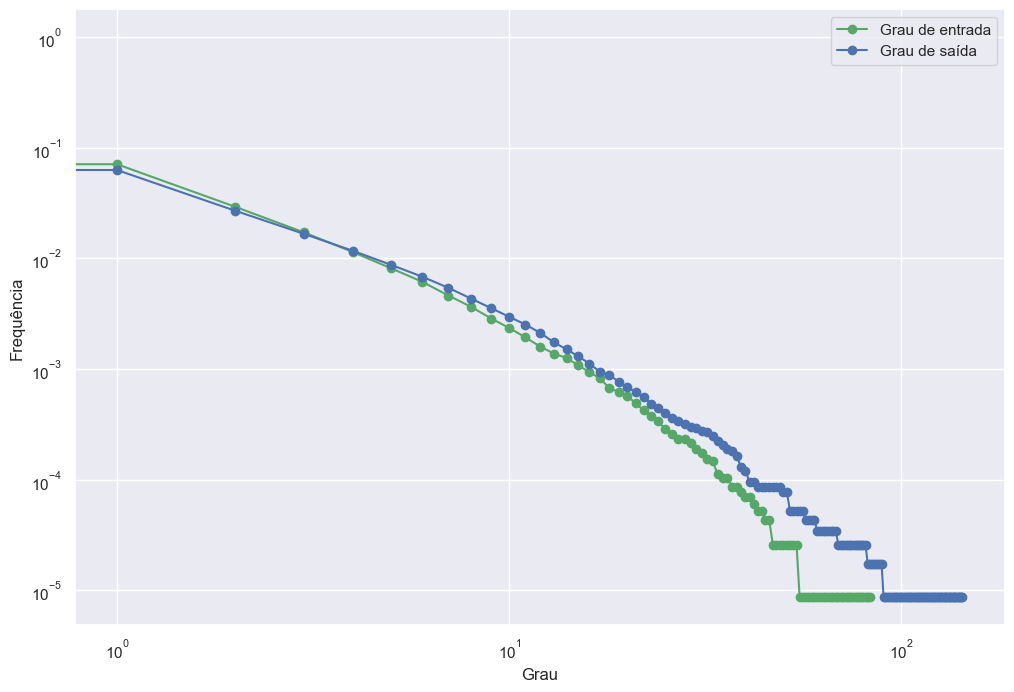

In [112]:
in_degree_freq = degree_histogram_directed(grafo_twitter_com_coordenadas, in_degree=True)
out_degree_freq = degree_histogram_directed(grafo_twitter_com_coordenadas, out_degree=True)
# degrees = range(len(in_degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='Grau de entrada') 
plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='Grau de saída')
plt.xlabel('Grau')
plt.ylabel('Frequência')
plt.legend()
plt.savefig('E://degree_distribution.jpg', format='jpg', dpi=300)
plt.show()

Quantidade de nós com coeficiente de clusterização igual a 0: 113902
Quantidade de nós com coeficiente de clusterização igual a 1: 69


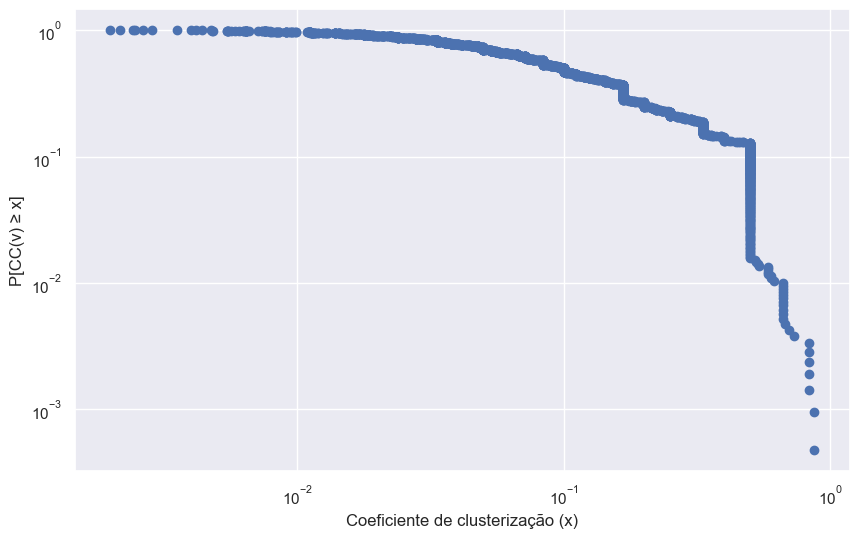

In [124]:
# Calculate the clustering coefficient for each node
clustering_coeffs = nx.clustering(grafo_twitter_com_coordenadas)
print(f"Quantidade de nós com coeficiente de clusterização igual a 0: {len([k for k, v in clustering_coeffs.items() if v == 0])}")
print(f"Quantidade de nós com coeficiente de clusterização igual a 1: {len([k for k, v in clustering_coeffs.items() if v == 1])}")
clustering_coeffs_edited = {k: v for k, v in clustering_coeffs.items() if v not in [0, 1]}
# Get the values of the clustering coefficients
cc_values = list(clustering_coeffs_edited.values())

# Sort the values in ascending order
cc_values.sort()

# Calculate the CCDF
ccdf = [1 - (i / len(cc_values)) for i in range(len(cc_values))]

# Plot the CCDF
plt.figure(figsize=(10, 6))
plt.plot(cc_values, ccdf, marker='o', linestyle='none')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Coeficiente de clusterização (x)')
plt.ylabel('P[CC(v) ≥ x]')
# plt.title('CCDF of Clustering Coefficient')
plt.grid(True)
# plt.savefig('E://ccdf_clustering_coefficient.jpg', format='jpg', dpi=300)
plt.show()
plt.close()

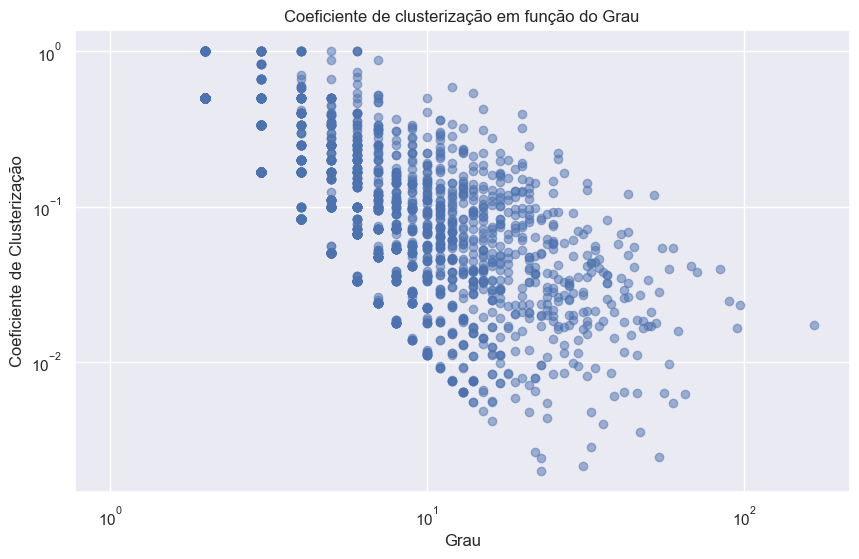

In [130]:
# Calculate the degree of each node
degrees = dict(grafo_twitter_com_coordenadas.degree())

# Calculate the clustering coefficient for each node
clustering_coeffs_edited = nx.clustering(grafo_twitter_com_coordenadas)

# Create lists of degrees and clustering coefficients
degree_values = list(degrees.values())
clustering_values = list(clustering_coeffs.values())

# Plot the clustering coefficient as a function of degree
plt.figure(figsize=(10, 6))
plt.scatter(degree_values, clustering_values, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Grau')
plt.ylabel('Coeficiente de Clusterização')
plt.title('Coeficiente de clusterização em função do Grau')
plt.grid(True)
plt.savefig('E://clustering_coefficient_vs_degree.jpg', format='jpg', dpi=300)
plt.show()
plt.close()


In [114]:
acessory.show_graph_metrics(grafo_twitter_com_coordenadas)

Nº de nós: 116087
Nº de links: 20035
Grau médio: 0.34517215536623397
Densidade: 1.486708799365272e-06


In [53]:
nodes_without_coordinates = [node for node in grafo_twitter.nodes() if 'median_lat' not in grafo_twitter.nodes[node]]

In [54]:
grafo = random_subgraph_by_porcentage(grafo_twitter_com_coordenadas, 0.03, True)

In [55]:
show_graph_metrics(grafo_twitter_com_coordenadas)

Nº de nós: 116087
Nº de links: 20035
Grau médio: 0.34517215536623397
Densidade: 1.486708799365272e-06


In [56]:
grafo_twitter_com_coordenadas.remove_nodes_from(list(nx.isolates(grafo_twitter_com_coordenadas)))

In [57]:
grafo2 = generate_subgraph(grafo_twitter_com_coordenadas)

In [58]:
giant_component = max(nx.strongly_connected_components(grafo_twitter_com_coordenadas), key=len)
giant_connected_component = grafo_twitter_com_coordenadas.subgraph(giant_component)

In [59]:
grafo = convert_geo_to_utm(grafo2, 'median_lat', 'median_lon')

for node in grafo.nodes():
    lat = grafo.nodes[node]['median_Y']
    lon = grafo.nodes[node]['median_X']
    grafo.nodes[node]['coords'] = (lat, lon)

In [60]:
raios = [1, 2, 2.5, 3, 4, 5, 10, 50, 100, 500, 1000, 5000, 7500]#
# raios = [9000, 9500, 10000, 11000]

metricas_grafos = {"densidade_grafo_social": [], "densidade_grafo_geografico": [], "grau_medio_grafo_social": [], "grau_medio_grafo_geografico": []}

In [61]:
metricas_social = return_graph_metrics(grafo)

for raio in tqdmBasic(raios, total=len(raios)):
    grafo_geo = geosocial.return_geographic_graph_by_radius(raio)
    
    metricas_geografico = return_graph_metrics(grafo_geo)
    
    if metricas_geografico["densidade"] >= metricas_social["densidade"]:
        print(f"Raio: {raio}, Grau médio: {metricas_geografico['grau_medio']}, Densidade: {metricas_geografico['densidade']}")
        break
    
    # metricas_grafos["densidade_grafo_social"].append(metricas_social["densidade"])
    # metricas_grafos["densidade_grafo_geografico"].append(metricas_geografico["densidade"])
    # metricas_grafos["grau_medio_grafo_social"].append(metricas_social["grau_medio"])
    # metricas_grafos["grau_medio_grafo_geografico"].append(metricas_geografico["grau_medio"])
    
    # degrees = []

    # for node in grafo_geo.nodes():
    #     degrees.append(nx.degree(grafo_geo, node))
        
    # if np.mean(degrees) >= 7.07:
    #     print(f"Raio: {raio}, Grau médio: {np.mean(degrees)}, Densidade: {nx.density(grafo_geo)}")
    #     break

  0%|          | 0/13 [00:00<?, ?it/s]


NameError: name 'geosocial' is not defined

In [ ]:
# Extract the data from the metricas_grafos dictionary
densidade_grafo_social = metricas_grafos["densidade_grafo_social"]
densidade_grafo_geografico = metricas_grafos["densidade_grafo_geografico"]
grau_medio_grafo_social = metricas_grafos["grau_medio_grafo_social"]
grau_medio_grafo_geografico = metricas_grafos["grau_medio_grafo_geografico"]

plt.figure(figsize=(10, 6))

# plt.plot(raios, densidade_grafo_social, label='Densidade do grafo social')
# plt.plot(raios, densidade_grafo_geografico, label='Densidade do grafo geográfico')
plt.plot(raios, grau_medio_grafo_social, label='Grau médio do grafo social')
plt.plot(raios, grau_medio_grafo_geografico, label='Grau médio do grafo geográfico')
plt.xlabel('Raio (m)')
plt.ylabel('Densidade')
plt.legend()
plt.show()

In [ ]:
plt.plot(raios, densidade_grafo_social, label='Densidade do grafo social')
plt.plot(raios, densidade_grafo_geografico, label='Densidade do grafo geográfico')
# plt.plot(raios, grau_medio_grafo_social, label='Grau médio do grafo social')
# plt.plot(raios, grau_medio_grafo_geografico, label='Grau médio do grafo geográfico')
plt.xlabel('Raio (m)')
plt.ylabel('Densidade')
plt.legend()
plt.show()

In [ ]:
# Extract the data from the metricas_grafos dictionary
densidade_grafo_social = metricas_grafos["densidade_grafo_social"]
densidade_grafo_geografico = metricas_grafos["densidade_grafo_geografico"]
grau_medio_grafo_social = metricas_grafos["grau_medio_grafo_social"]
grau_medio_grafo_geografico = metricas_grafos["grau_medio_grafo_geografico"]

# Create a list of raios for the x-axis
raios = [1, 2, 2.5, 3, 4, 5, 10, 50, 100, 500, 1000, 5000, 7500, 9000, 9500, 10000, 11000]

# Plot the data
plt.plot(raios, densidade_grafo_social, label="Densidade Grafo Social")
plt.plot(raios, densidade_grafo_geografico, label="Densidade Grafo Geográfico")
plt.plot(raios, grau_medio_grafo_social, label="Grau Médio Grafo Social")
plt.plot(raios, grau_medio_grafo_geografico, label="Grau Médio Grafo Geográfico")

# Add labels and legend
plt.xlabel("Raio")
plt.ylabel("Valor")
plt.legend()

# Show the plot
plt.show()

### Criando grafo geográfico

In [44]:
geosocial = ga.GeoSocial(grafo, lat='median_Y', lon='median_X')

In [45]:
grafo_geo = geosocial.return_geographic_graph_by_radius(1000, coords_str='coords')
show_graph_metrics(grafo_geo)

Nº de nós: 10701
Nº de links: 1030221
Grau médio: 192.5466778805719
Densidade: 0.017995016624352513


### Análise dos componentes conexos

In [ ]:
componentes = nx.weakly_connected_components(grafo2)
# type(componentes)
print(sum([len(componente) if len(componente) > 1 else 0 for componente in componentes]))
componentes = nx.weakly_connected_components(grafo2)
print(sorted([len(componente) for componente in componentes], reverse=True))


In [ ]:
componentes = nx.connected_components(grafo_geo)
print(sum([len(componente) if len(componente) == 1 else 0 for componente in componentes]))

In [ ]:
componentes = nx.weakly_connected_components(grafo2)
# type(componentes)
print(sum([len(componente) for componente in componentes]))

In [ ]:
componente = max(nx.connected_components(grafo_geo), key=len)
grafo_geo_conectado = grafo_geo.subgraph(componente)

show_graph_metrics(grafo_geo_conectado)

In [ ]:
for node in grafo_geo.nodes():
    if 'coords' in grafo_geo.nodes[node]:
        del grafo_geo.nodes[node]['coords']

In [ ]:
nx.write_graphml_lxml(grafo_geo, "D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_geo.graphml")

### Dividindo em grafos com a mesma quantidade de nós

In [ ]:
# Get the nodes of grafo2
nodes = list(grafo.nodes())

# Divide the nodes into 10 sets
sets_of_nodes = np.array_split(nodes, 10)

# Print the sets of nodes
for i, nodes_set in enumerate(sets_of_nodes):
    print(f"Set {i+1}: {nodes_set}")

### Dividindo em grafos por proximidades

In [ ]:
grafo2 = grafo.copy()
nodes_to_remove = ['afterpurpose', 'BastosDanilsa', 'suxrainstyles', 'encontra_me', 'ohtommogasm', 'soeiro_a_saloia', 'miriaamfdz_']
grafo2.remove_nodes_from(nodes_to_remove)

In [ ]:
latitude = 'median_Y'
longitude = 'median_X'

# Create sets of nodes within a 2km radius
sets_of_nodes = []
for node in grafo.nodes():
    x1, y1 = grafo.nodes[node][latitude], grafo.nodes[node][longitude]
    found = False
    for s in sets_of_nodes:
        x2, y2 = grafo.nodes[s[0]][latitude], grafo.nodes[s[0]][longitude]
        distance = calculateDistance(x1, y1, x2, y2)
        if distance <= 2000:  # 2km = 2000 meters
            s.append(node)
            found = True
            break
    if not found:
        sets_of_nodes.append([node])

# Print the sets
for i, s in enumerate(sets_of_nodes):
    print(f"Set {i+1}: {s}")

In [ ]:
count = 0
for s in sets_of_nodes:
    if len(s) == 1:
        count += 1

print(f"Total sets with only one color: {count}")

In [ ]:
# Create a dictionary to store the color for each node
node_colors_geo = {}

# Assign a unique color to each set with more than one node
for i, set_nodes in enumerate(sets_of_nodes):
    if len(set_nodes) > 1:
        color = plt.cm.tab10(i % 13)  # Use a colormap to generate unique colors
        for node in set_nodes:
            node_colors_geo[node] = color

# Assign the same color to nodes in sets with only one node
for set_nodes in sets_of_nodes:
    if len(set_nodes) == 1:        
        node = set_nodes[0]
        if node not in node_colors_geo:
            color = plt.cm.tab10((len(sets_of_nodes) - count) * 3)  # Use the first color from the colormap
            node_colors_geo[node] = color

# Plot the graph with colored nodes
pos = {node: (grafo.nodes[node]['median_X'], grafo.nodes[node]['median_Y']) for node in grafo.nodes()}
plt.figure(figsize=(10, 10))
nx.draw_networkx(grafo, pos=pos, node_color=[node_colors_geo.get(node, 'gray') for node in grafo.nodes()], with_labels=False)
plt.axis('off')
plt.show()

In [ ]:
dispersao_inversa = 0

for i, nodes_set in enumerate(sets_of_nodes):
    num_nodes = grafo.number_of_nodes()
    
    if len(nodes_set) <= 1:
        dispersao = 0
        print(f"Set {i+1} inverse Ward dispersion: {dispersao}")        
        continue
    
    dispersao = calculate_ward_dispersion(grafo, nodes_set, latitude='median_Y', longitude='median_X')
    
    if dispersao == 0:
        print(f"Set {i+1} inverse Ward dispersion: {dispersao}")                
        continue
    
    dispersao_inversa += 1 / dispersao
    print(f"Set {i+1} inverse Ward dispersion: {1 / dispersao}")
    
print(f"Total inverse Ward dispersion: {dispersao_inversa}")

In [ ]:
def geo_social_modularity(D, graph: nx.graph, communities: list, latitude = 'latitude', longitude = 'longitude', d: float = 0.1):
            
        def calculate_ward_dispersion(grafo: nx.graph, comunidades, latitude, longitude):
            if len(comunidades) <= 1:
                return 0
            
            coords = np.array([[float(grafo.nodes[node][longitude]), float(grafo.nodes[node][latitude])] for node in comunidades])
            
            def community_dispersion(coords: np.array):
                centroid = np.mean(coords, axis=0)
                
                return np.sum((coords - centroid) ** 2)
                    
            return sum(map(community_dispersion, coords))
        
        def calculate_transformation(dispersion: float, d: float):            
            return (math.log(dispersion) + math.log(D) + math.log(d)) / (math.log(D) - math.log(d))
        
        
        dispersao = 0
        for community in communities:
            dispersao_comunidade = calculate_ward_dispersion(graph, community, latitude, longitude)
            
            dispersao += dispersao_comunidade if dispersao_comunidade != 0 else 0
        
        if dispersao == 0:
            return 0
            
        return math.log(calculate_transformation(dispersao, d))
    
    
geosocial = ga.GeoSocial(grafo, lat="median_Y", lon="median_X")

D = geosocial.D
d = 0.01
centroid = geosocial.centroid

print(geo_social_modularity(D, grafo, sets_of_nodes, latitude='median_Y', longitude='median_X', d=0.1))

In [ ]:
geosocial = ga.GeoSocial(grafo, lat="median_Y", lon="median_X")

D = geosocial.D
d = 0.01
centroid = geosocial.centroid

modularidade = geosocial.geo_social_modularity(sets_of_nodes, d=d)

In [ ]:
# Cria um grafo vazio
grafo = nx.Graph()

# Adiciona 5 nós ao grafo com atributos de coordenadas euclidianas
for i in range(4):
    x = random.uniform(0, 10)  # Coordenada x aleatória entre 0 e 10
    y = random.uniform(0, 10)  # Coordenada y aleatória entre 0 e 10
    grafo.add_node(i, x=x, y=y)

# Exibe os atributos dos nós
for node in grafo.nodes():
    print(f"Node {node}: {grafo.nodes[node]}")

In [ ]:
grafo.add_node(4, x=100, y=100)

In [ ]:
for i in range(4):
    grafo.add_edge(i, 4)

In [ ]:
show_graph_metrics(grafo)

In [ ]:
# Get the latitude and longitude attributes from the nodes
latitude = nx.get_node_attributes(grafo, 'y')
longitude = nx.get_node_attributes(grafo, 'x')

# Create a scatter plot of the nodes using latitude and longitude as coordinates
plt.figure(figsize=(10, 8))
plt.scatter(longitude.values(), latitude.values(), color='blue', alpha=0.7)

# Add labels to the nodes
for node, pos in zip(grafo.nodes(), zip(longitude.values(), latitude.values())):
    plt.annotate(node, pos, fontsize=12, ha='center', textcoords="offset points", xytext=(0, 5))

# Set plot title and axis labels
plt.title('Posição dos nós no plano cartesiano')
plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')

# Show the plot
plt.show()

In [ ]:
comunidades = [{0, 4}, {1, 2, 3}]

geosocial = ga.GeoSocial(grafo, lat="y", lon="x")

D = geosocial.D
d = 1
centroid = geosocial.centroid

In [ ]:
geosocial = ga.GeoSocial(grafo, lat="median_Y", lon="meidan_X")

D = geosocial.D
d = 1
centroid = geosocial.centroid

In [ ]:
print(f"D: {D}, d: {d}, centroid: {centroid}")

In [ ]:
comunidades = [[{0, 1, 2, 3, 4}], [{0,4}, {1, 2, 3}], [{0, 1, 2, 3}, {4}], [{0,1}, {2, 3}, {4}]]

for i, comunidade in enumerate(comunidades):
    print(f"Modularidade da comunidade {i+1}: {geosocial.geo_social_modularity(comunidade, d=d)}")

In [ ]:
comunidades_algoritmo = geosocial.custom_greedy_modularity_communities()

In [ ]:
plt.figure(figsize=(25,10))
pos = nx.planar_layout(grafo)
nx.draw(grafo, pos=pos, with_labels=True)
plt.show()

In [ ]:
comunidades = list(nx.community.girvan_newman(grafo))

In [ ]:
for comunidade in comunidades:
    modularity_partition = nx.community.modularity(grafo, comunidade)
    print(len(comunidade), modularity_partition)

In [ ]:
# Modularity -> measures the strength of division of a network into modules
modularity_df = pd.DataFrame(
    [
        [k + 1, nx.community.modularity(grafo, comunidades[k])]
        for k in range(len(comunidades))
    ],
    columns=["k", "modularity"],
)

In [ ]:
def create_community_node_colors(graph, communities):
    number_of_colors = len(communities[0])
    colors = ["#D4FCB1", "#CDC5FC", "#FFC2C4", "#F2D140", "#BCC6C8"][:number_of_colors]
    node_colors = []
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors

In [ ]:
# function to plot graph with node colouring based on communities
def visualize_communities(graph, communities, i):
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx.community.modularity(graph, communities), 6)
    title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph, k=0.3, iterations=50, seed=2)
    plt.subplot(3, 1, i)
    plt.title(title)
    nx.draw(
        graph,
        pos=pos,
        node_size=1000,
        node_color=node_colors,
        with_labels=True,
        font_size=20,
        font_color="black",
    )

In [ ]:
fig, ax = plt.subplots(3, figsize=(15, 20))

# Plot graph with colouring based on communities
visualize_communities(grafo, comunidades[0], 1)
visualize_communities(grafo, comunidades[1], 2)

# Plot change in modularity as the important edges are removed
modularity_df.plot.bar(
    x="k",
    ax=ax[2],
    color="#F2D140",
    title="Modularity Trend for Girvan-Newman Community Detection",
)
plt.show()

## Criando as comunidades

### Metodologia de Girvan-Newman

#### Geração

In [ ]:
# Gerando um subgrafo com o maior componente conexo
componentes = nx.weakly_connected_components(grafo_twitter)
maior_componente = max(componentes, key=len)
grafo_twitter_conexo = grafo_twitter.subgraph(maior_componente)

In [ ]:
grafo_twitter_conexo = nx.read_graphml("D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_twitter_conexo.graphml")

In [ ]:
degrees = []

for node in grafo.nodes():
    degrees.append(nx.degree(grafo, node))
    
print(f"Nº de nós: {grafo.number_of_nodes()}")
print(f"Nº de links: {grafo.number_of_edges()}")
print(f"Grau médio: {np.mean(degrees)}")
print(f"Densidade: {nx.density(grafo)}")
print(f"Cluster global: {nx.transitivity(grafo)}")
print(f"Cluster médio: {nx.average_clustering(grafo)}")

In [ ]:
# atribuir as comunidades aos nós do grafo
comunidades = list(nx.community.louvain_communities(grafo))
print(f"Modularidade: {nx.community.modularity(grafo, comunidades)}")
comunidades_dict = {}
for i, comunidade in enumerate(comunidades):
    for node in comunidade:
        comunidades_dict[node] = i
        
nx.set_node_attributes(grafo, comunidades_dict, 'comunidade_louvain')

In [ ]:
nx.write_graphml_lxml(grafo_twitter_conexo_20, "D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_twitter_conexo_20.graphml")

In [ ]:
grafo_twitter_20 = nx.read_graphml("D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_twitter_conexo_20.graphml")

In [ ]:
# Gerando um subgrafo com o maior componente conexo
componentes = nx.weakly_connected_components(grafo_twitter_20)
maior_componente = max(componentes, key=len)
grafo_twitter_20_conexo = grafo_twitter_20.subgraph(maior_componente)

In [ ]:
# copy the graph as undirected

grafo_twitter_20_conexo_undirected = grafo_twitter_20_conexo.to_undirected()

In [ ]:
# gerar comunidades Edge Betweeness
comunidades = list(nx.community.edge_betweenness_partition(grafo_twitter_20_conexo_undirected, 101))
print(f"Modularidade: {nx.community.modularity(grafo_twitter_20_conexo_undirected, comunidades)}")
comunidades_dict = {}
for i, comunidade in enumerate(comunidades):
    for node in comunidade:
        comunidades_dict[node] = i
        
nx.set_node_attributes(grafo_twitter_20_conexo_undirected, comunidades_dict, 'comunidade_girvan_newman')

In [ ]:
with open("E://comunidades_greedy_sem_autoloop.txt", "w") as f:
    for comunidade in comunidades:
        f.write(f"{comunidade}\n")

In [ ]:
with open("E://comunidades_greedy_sem_autoloop.txt", "r") as f:
    comunidades = f.readlines()

#### Estatísticas das comunidades

In [ ]:
comunidades = list(nx.community.louvain_communities(grafo_twitter_conexo))
print(f"Modularidade: {nx.community.modularity(grafo_twitter_conexo, comunidades)}")
comunidades_dict = {}
for i, comunidade in enumerate(comunidades):
    for node in comunidade:
        comunidades_dict[node] = i
        
nx.set_node_attributes(grafo_twitter_conexo, comunidades_dict, 'comunidade_louvain')

In [ ]:
remove = [node for node in grafo_twitter_conexo.nodes() if 'median_lat' not in grafo_twitter_conexo.nodes[node]]

In [ ]:
grafo_twitter_conexo.remove_nodes_from(remove)

In [ ]:
show_graph_metrics(grafo_twitter_conexo)

In [ ]:
nodes = list(grafo_twitter_conexo.nodes())[:10]

# Print the nodes and their attributes
for node in nodes:
    attributes = grafo_twitter_conexo.nodes[node]
    print(f"Node: {node}")
    print(f"Attributes: {attributes}")
    print("--------------------")

In [ ]:
estatisticas_grafo = calculate_geostatistics(graph=grafo_twitter_conexo, column='comunidade_louvain')

In [ ]:
myKeys = list(estatisticas_grafo.keys())
myKeys.sort()
sorted_estatisticas_grafo = {i: estatisticas_grafo[i] for i in myKeys}

In [ ]:
text_size_axis = 12
text_size_standart = 16

# Extract the keys and values from the 'estatisticas' dictionary
x = [len(sorted_estatisticas_grafo[key]['x_points']) for key in sorted_estatisticas_grafo.keys()]
y = [sorted_estatisticas_grafo[key]['mean_distance_to_center'] for key in sorted_estatisticas_grafo.keys()]

# Plot the values in bars, y-axis in log
plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Quantidade de nós por comunidade', fontsize=text_size_standart)
plt.ylabel('Distância média ao centro em metros', fontsize=text_size_standart)
plt.title('Dados por comunidade', fontsize=text_size_standart)
plt.xticks(fontsize=text_size_axis)
plt.yticks(fontsize=text_size_axis, rotation=90)
plt.grid(axis='y', color='black')
plt.show()

In [ ]:
text_size_axis = 48
text_size_standart = 52

# Extract the mean and standard deviation from estatisticas
means = [sorted_estatisticas_grafo[key]['mean_distance_to_center'] for key in sorted_estatisticas_grafo.keys()]
stds = [sorted_estatisticas_grafo[key]['standard_deviation'] for key in sorted_estatisticas_grafo.keys()]

# Create a list of community names
community_names = [str(community) for community in sorted_estatisticas_grafo]

plt.figure(figsize=(100, 30))
# Plot the mean with error bars representing the standard deviation
plt.errorbar(community_names, means, yerr=stds, fmt='o', capsize=5, label='Média e Desvio Padrão', ecolor='red', elinewidth=2, capthick=2, markersize=10)

# Set the labels and title
plt.xlabel('Communidade', fontsize=text_size_standart)
plt.ylabel('Distância média ao centro em metros', fontsize=text_size_standart)
plt.xticks(fontsize=text_size_axis*.5)
plt.yticks(fontsize=text_size_axis, rotation=90)
plt.title('Distância média ao centro por comunidade', fontsize=text_size_standart)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)



plt.legend(fontsize=text_size_standart)  # Adiciona a legenda
plt.show()


#### Visualização

In [ ]:
colors = ['#' + ''.join(random.choices('0123456789ABCDEF', k=6)) for _ in range(len(comunidades))]

for i, comunidade in enumerate(comunidades):
    for node in comunidade:
        grafo_twitter_conexo.nodes[node]['comunidade'] = i

In [ ]:
nx.write_graphml_lxml(grafo_twitter_conexo, "D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_twitter_conexo.graphml")

In [ ]:
pos = nx.nx_agraph.graphviz_layout(grafo_twitter_conexo, prog="dot")

### Metodologia K-Means

#### Geração

In [ ]:
# Get the attributes of each node
attributes = nx.get_node_attributes(grafo_twitter_conexo, 'median_X')
df = pd.DataFrame.from_dict(attributes, orient='index', columns=['median_X'])

# Add additional attributes
df['median_Y'] = nx.get_node_attributes(grafo_twitter_conexo, 'median_Y').values()
df['community_louvain'] = nx.get_node_attributes(grafo_twitter_conexo, 'comunidade_louvain').values()
# df['community_greedy'] = nx.get_node_attributes(grafo_twitter_conexo, 'comunidade_girvan_newman').values()

# Print the dataframe
print(df)


In [ ]:
kmeans = KMeans(n_clusters=167, init='k-means++')
df['comunidade_kMeans'] = kmeans.fit_predict(df[df.columns[0:2]])

#### Visualização

In [ ]:
estatisticas_dataframe = calculate_geostatistics(df=df, column='comunidade_kMeans')

In [ ]:
myKeys = list(estatisticas_dataframe.keys())
myKeys.sort()
sorted_estatisticas_dataframe = {i: estatisticas_dataframe[i] for i in myKeys}

In [ ]:
text_size_axis = 12
text_size_standart = 16

# Extract the keys and values from the 'estatisticas' dictionary
x = [len(sorted_estatisticas_dataframe[key]['x_points']) for key in sorted_estatisticas_dataframe.keys()]
y = [sorted_estatisticas_dataframe[key]['mean_distance_to_center'] for key in sorted_estatisticas_dataframe.keys()]

# Plot the values in bars, y-axis in log
plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.yscale('log')
plt.xlabel('Quantidade de nós por comunidade', fontsize=text_size_standart)
plt.ylabel('Distância média ao centro em metros', fontsize=text_size_standart)
plt.title('Dados por comunidade', fontsize=text_size_standart)
plt.xticks(fontsize=text_size_axis)
plt.yticks(fontsize=text_size_axis, rotation=90)
plt.grid(axis='y', color='black')
plt.show()

In [ ]:
text_size_axis = 48
text_size_standart = 52

# Extract the mean and standard deviation from estatisticas
means = [sorted_estatisticas_dataframe[key]['mean_distance_to_center'] for key in sorted_estatisticas_dataframe.keys()]
stds = [sorted_estatisticas_dataframe[key]['standard_deviation'] for key in sorted_estatisticas_dataframe.keys()]

# Create a list of community names
community_names = [str(community) for community in sorted_estatisticas_dataframe]

plt.figure(figsize=(100, 30))
# Plot the mean with error bars representing the standard deviation
plt.errorbar(community_names, means, yerr=stds, fmt='o', capsize=5, label='Média e Desvio Padrão', ecolor='red', elinewidth=2, capthick=2, markersize=10)

# Set the labels and title
plt.xlabel('Communidade', fontsize=text_size_standart)
plt.ylabel('Distância média ao centro em metros', fontsize=text_size_standart)
plt.xticks(fontsize=text_size_axis*.5)
plt.yticks(fontsize=text_size_axis, rotation=90)
plt.title('Distância média ao centro por comunidade', fontsize=text_size_standart)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)



plt.legend(fontsize=text_size_standart)  # Adiciona a legenda
plt.show()

### Metodologia Affinity Propagation

#### Geração

In [ ]:
affinity = AffinityPropagation(preference=0.5)
df['comunidade_affinity'] = affinity.fit_predict(df[df.columns[0:2]])

In [ ]:
estatisticas_affinity = calculate_geostatistics(df=df, column='comunidade_affinity')

In [ ]:
myKeys = list(estatisticas_affinity.keys())
myKeys.sort()
sorted_estatisticas_affinity = {i: estatisticas_affinity[i] for i in myKeys}

#### Visualização

In [ ]:
text_size_axis = 12
text_size_standart = 16

# Extract the keys and values from the 'estatisticas' dictionary
x = [len(sorted_estatisticas_affinity[key]['x_points']) for key in sorted_estatisticas_affinity.keys()]
y = [sorted_estatisticas_affinity[key]['mean_distance_to_center'] for key in sorted_estatisticas_affinity.keys()]

# Plot the values in bars, y-axis in log
plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.yscale('log')
plt.xlabel('Quantidade de nós por comunidade', fontsize=text_size_standart)
plt.ylabel('Distância média ao centro em metros', fontsize=text_size_standart)
plt.title('Dados por comunidade', fontsize=text_size_standart)
plt.xticks(fontsize=text_size_axis)
plt.yticks(fontsize=text_size_axis, rotation=90)
plt.grid(axis='y', color='black')
plt.show()

In [ ]:
agglomerative = AgglomerativeClustering(n_clusters=167, linkage='complete')
df['comunidade_aglo'] = agglomerative.fit_predict(df[df.columns[0:2]])

In [ ]:
estatisticas_aglomerado = calculate_geostatistics(df=df, column='comunidade_aglo')

In [ ]:
myKeys = list(estatisticas_aglomerado.keys())
myKeys.sort()
sorted_estatisticas_aglomerado = {i: estatisticas_aglomerado[i] for i in myKeys}

### Comunidades geosocial

In [49]:
comunidades_social = nx.community.greedy_modularity_communities(grafo)
comunidades_geo = nx.community.greedy_modularity_communities(grafo_geo)
comunidades_social_05 = nx.community.greedy_modularity_communities(grafo, resolution=0.5)
comunidades_social_099 = nx.community.greedy_modularity_communities(grafo, resolution=0.99)

In [50]:
node_social_community_map = map_community_nodes(comunidades_social)
node_geo_community_map = map_community_nodes(comunidades_geo)

In [51]:
for node in tqdmBasic(grafo.nodes(), total=grafo.number_of_nodes()):
    if 'coords' in grafo.nodes[node]:
        del grafo.nodes[node]['coords']
    
    grafo.nodes[node]['community_social'] = node_social_community_map[node]
    
    for node_geo in grafo_geo.nodes(data=True):
        if node_geo[1]['username'] == node:
            grafo.nodes[node]['community_geographic'] = node_geo_community_map[node_geo[0]]
            break
    

100%|██████████| 10701/10701 [00:05<00:00, 1841.19it/s]


#### Jaccard Similarity

In [52]:
# Initialize the matrix with zeros
jaccard_matrix = np.zeros((len(comunidades_social), len(comunidades_social_099)))

# Iterate over each pair of communities
for i, com_social in tqdmBasic(enumerate(comunidades_social), total=len(comunidades_social)):
    for j, com_geo in enumerate(comunidades_social_099):
        jaccard_value = jaccard_similarity(set(com_social), set(com_geo))
        
        jaccard_matrix[i, j] = jaccard_value

100%|██████████| 1213/1213 [00:02<00:00, 561.06it/s]


In [53]:
# Initialize the matrix with zeros
jaccard_matrix = np.zeros((len(comunidades_social), len(comunidades_geo)))

# Iterate over each pair of communities
for i, com_social in tqdmBasic(enumerate(comunidades_social), total=len(comunidades_social)):
    for j, com_geo in enumerate(comunidades_geo):
        jaccard_value = jaccard_similarity(set(com_social), set(com_geo))
        
        jaccard_matrix[i, j] = jaccard_value

100%|██████████| 1213/1213 [00:00<00:00, 1268.83it/s]


##### Visualização

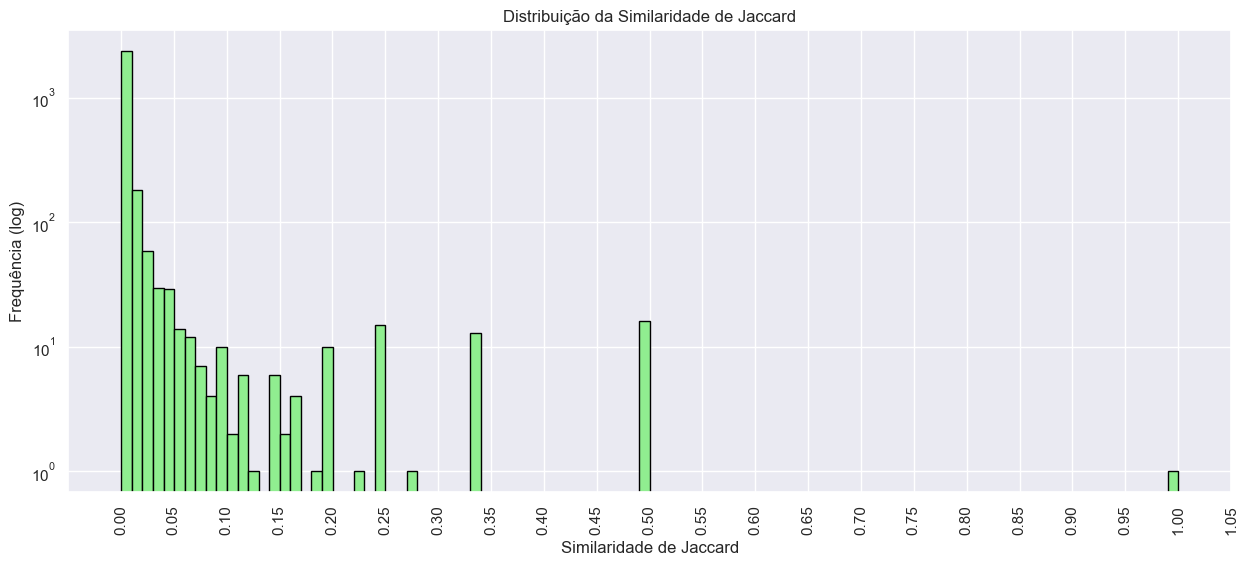

In [54]:
# store the jaccard similarity values different from zero in a list
jaccard_values = jaccard_matrix[jaccard_matrix != 0]

# Plot the histogram of the Jaccard similarity values in logarithmic scale    
plt.figure(figsize=(15, 6))
plt.hist(jaccard_values, bins=100, color='lightgreen', edgecolor='black', log=True)
plt.xlabel('Similaridade de Jaccard')
plt.xticks(np.arange(0, 1.1, 0.05), rotation=90)


plt.ylabel('Frequência (log)')
plt.title('Distribuição da Similaridade de Jaccard')
    
plt.show()

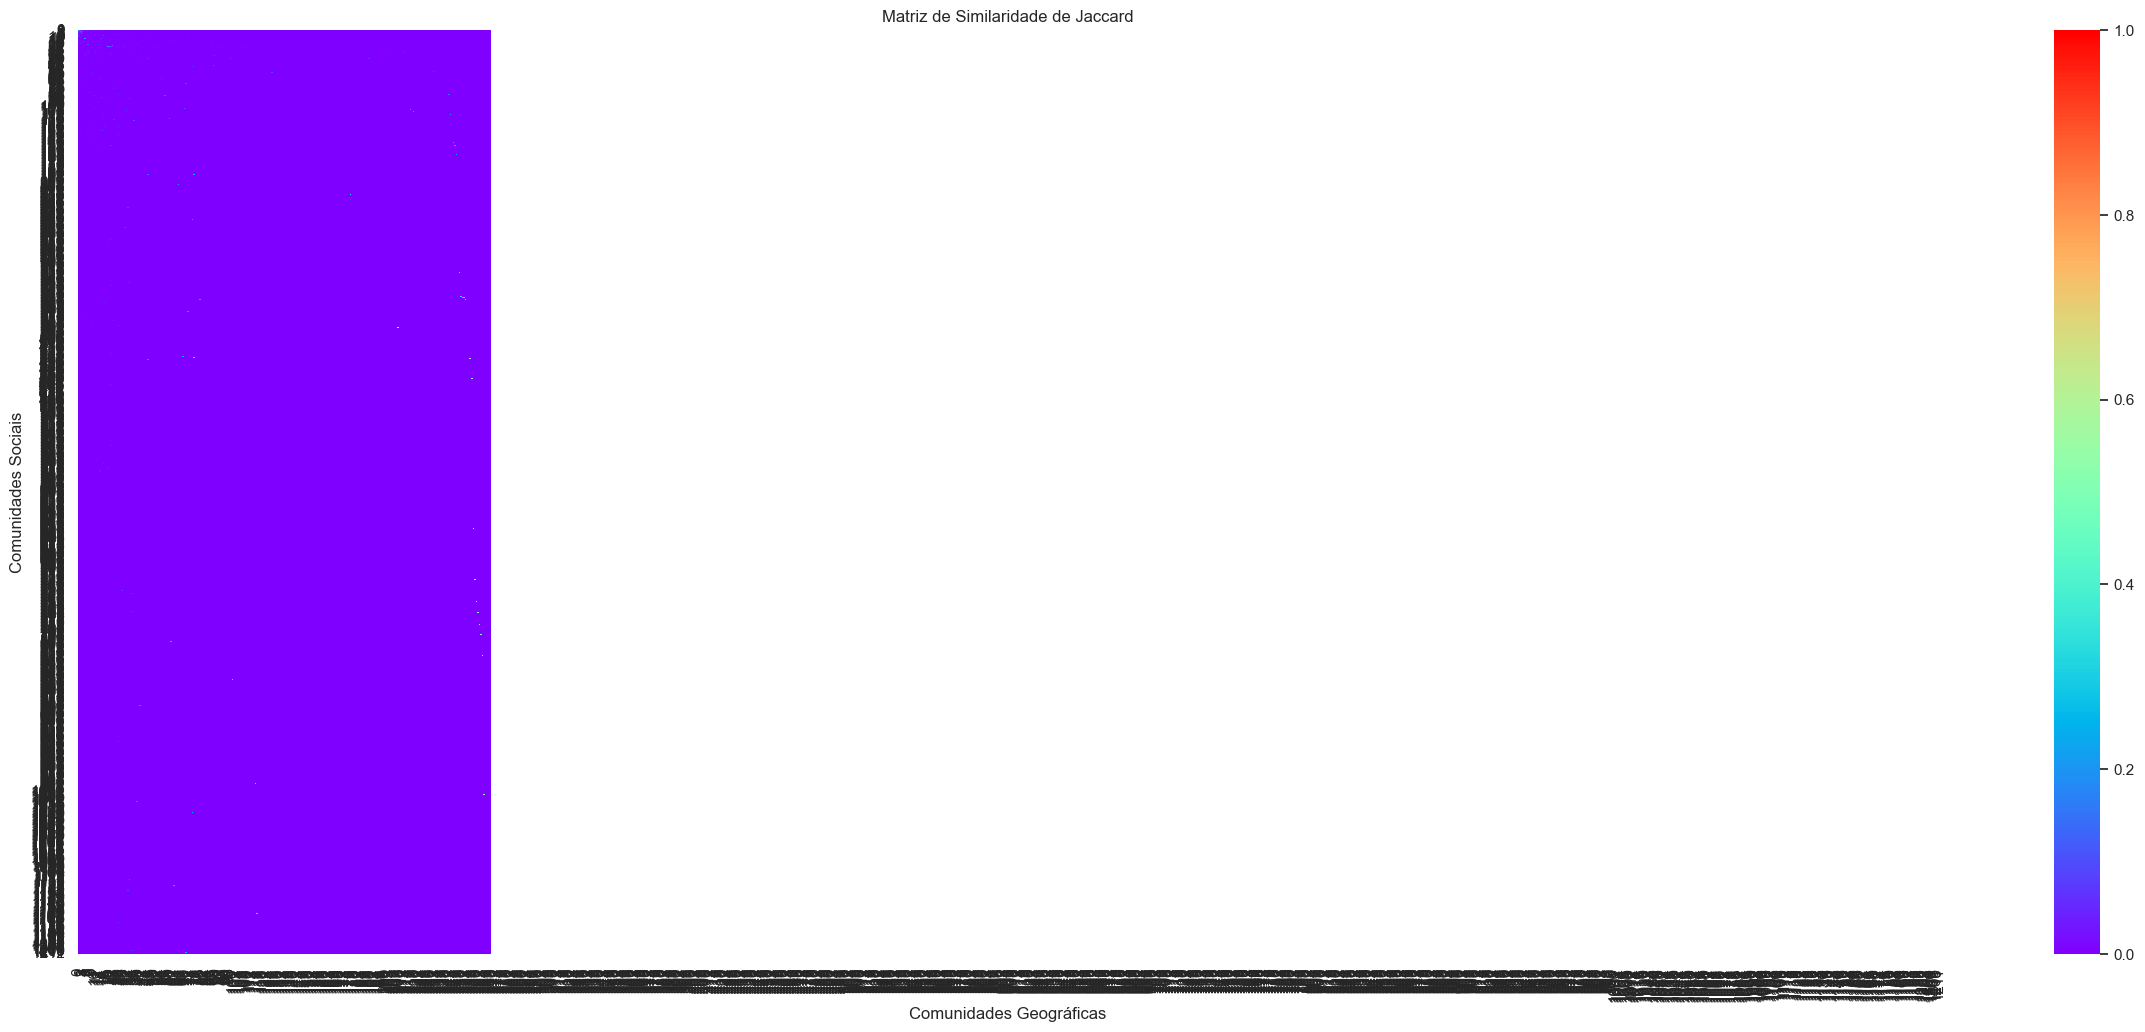

In [58]:
plt.figure(figsize=(30,12))
sns.heatmap(jaccard_matrix, cmap='rainbow', xticklabels=range(len(comunidades_social_099)), yticklabels=range(len(comunidades_social)))
plt.xlabel('Comunidades Geográficas')
plt.ylabel('Comunidades Sociais')
plt.title('Matriz de Similaridade de Jaccard')
plt.show()

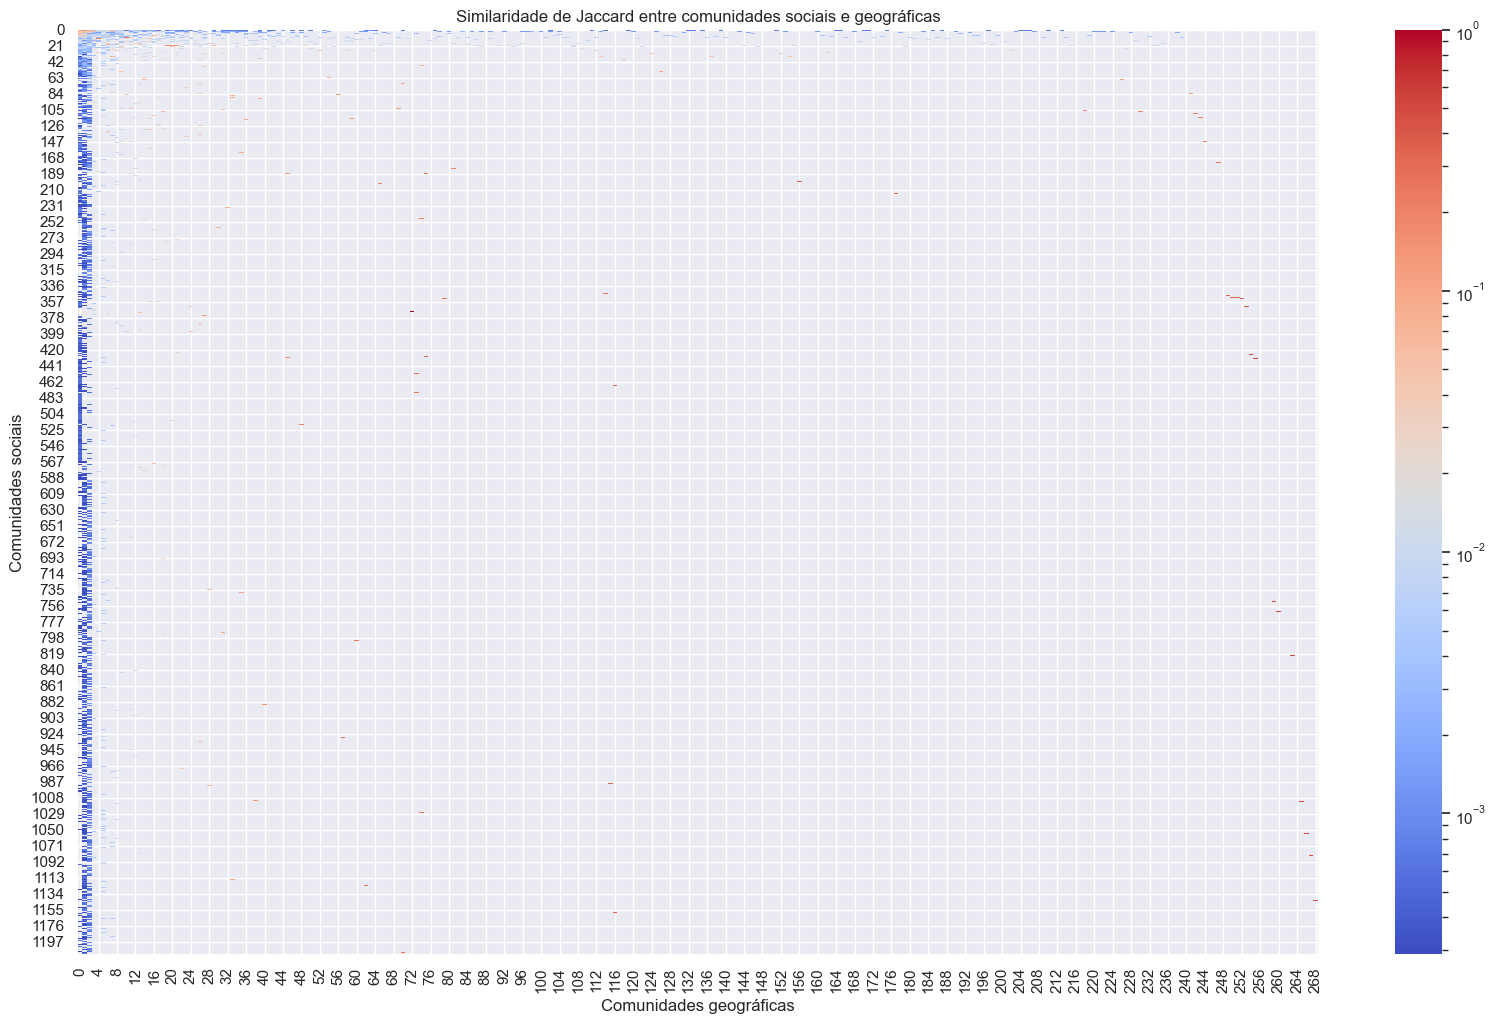

In [57]:
# jaccard matrix heatmap using log scale
plt.figure(figsize=(20, 12))
sns.heatmap(jaccard_matrix, cmap='coolwarm', norm=LogNorm())
plt.xlabel('Comunidades geográficas')
plt.ylabel('Comunidades sociais')
plt.title('Similaridade de Jaccard entre comunidades sociais e geográficas')
plt.show()

#### Adjusted Mutual Information

In [60]:
all_elements = set().union(*comunidades_social).union(*comunidades_geo)

In [61]:
labels_true = assign_labels(comunidades_social, all_elements)
labels_pred = assign_labels(comunidades_geo, all_elements)

ami_score = ami(labels_true, labels_pred)

print(f"Adjusted Mutual Information (AMI) score: {ami_score}")


Adjusted Mutual Information (AMI) score: 0.07123909893028639


In [62]:
all_elements_1 = set().union(*comunidades_social).union(*comunidades_social_05)

labels_true_1 = assign_labels(comunidades_social, all_elements_1)
labels_pred_1 = assign_labels(comunidades_social_05, all_elements_1)

ami_score = ami(labels_true_1, labels_pred_1)

print(f"Adjusted Mutual Information (AMI) score: {ami_score}")

Adjusted Mutual Information (AMI) score: 0.7368276640090176


In [63]:
all_elements_2 = set().union(*comunidades_social).union(*comunidades_social_099)

labels_true_2 = assign_labels(comunidades_social, all_elements_2)
labels_pred_2 = assign_labels(comunidades_social_099, all_elements_2)

ami_score = ami(labels_true_2, labels_pred_2)

print(f"Adjusted Mutual Information (AMI) score: {ami_score}")

Adjusted Mutual Information (AMI) score: 0.9935116998349767


## Teste Clube de Karatê

In [41]:
# Criar a rede do clube de karatê
G = nx.karate_club_graph()

# Gerar coordenadas fictícias
num_nodes = G.number_of_nodes()
latitudes = np.random.uniform(-9.2298402786254883, -9.0905752182006836, num_nodes)
longitudes = np.random.uniform(38.6914024353029617, 38.7958564758300781, num_nodes)

# Atribuir coordenadas como atributos dos nós
for i, node in enumerate(G.nodes):
    G.nodes[node]['latitude'] = latitudes[i]
    G.nodes[node]['longitude'] = longitudes[i]
    
# Exibir algumas coordenadas
for node in list(G.nodes)[:5]:
    print(f"Nó {node}: Latitude {G.nodes[node]['latitude']}, Longitude {G.nodes[node]['longitude']}")

Nó 0: Latitude -9.122033985417197, Longitude 38.793169448620034
Nó 1: Latitude -9.206227896438454, Longitude 38.724049193370654
Nó 2: Latitude -9.22868227319594, Longitude 38.718878408452525
Nó 3: Latitude -9.104340599605305, Longitude 38.74608882650673
Nó 4: Latitude -9.165726500989363, Longitude 38.74535793748169


In [42]:
grafo_karate = convert_geo_to_utm(G, 'latitude', 'longitude')

for node in grafo_karate.nodes():
    lat = grafo_karate.nodes[node]['median_Y']
    lon = grafo_karate.nodes[node]['median_X']
    grafo_karate.nodes[node]['coords'] = (lat, lon)
    
for node in list(G.nodes)[:5]:
    print(f"Nó {node}: Coordenadas {grafo_karate.nodes[node]['coords']}")
    
geosocial_karate = ga.GeoSocial(grafo_karate, lat='latitude', lon='longitude')

grafo_geo_karate = geosocial_karate.return_geographic_graph_by_radius(3500)

comunidades_karate = nx.community.greedy_modularity_communities(G)
comunidades_geo_karate = nx.community.greedy_modularity_communities(grafo_geo_karate)
comunidades_karate_05 = nx.community.greedy_modularity_communities(G, resolution=0.5)
comunidades_karate_099 = nx.community.greedy_modularity_communities(G, resolution=0.99)

Nó 0: Coordenadas (8991649.537583848, 477274.0523906141)
Nó 1: Coordenadas (8982336.03396433, 469686.4080267508)
Nó 2: Coordenadas (8979853.040742772, 469120.3367046911)
Nó 3: Coordenadas (8993602.401881695, 472099.5662892963)
Nó 4: Coordenadas (8986815.577241484, 472024.0424779445)


In [43]:
max_distance = 0

for node in grafo_geo_karate.nodes():
    coords = grafo_geo_karate.nodes[node]['coords']
    
    for other in grafo_geo_karate.nodes():
        if node == other:
            continue
        
        other_coords = grafo_geo_karate.nodes[other]['coords']
        distance = calculateDistance(coords[0], coords[1], other_coords[0], other_coords[1])
        
        if distance > max_distance:
            max_distance = distance

print(f"Maior distância: {max_distance/1000:,.3f} km.")

Maior distância: 16.147 km.


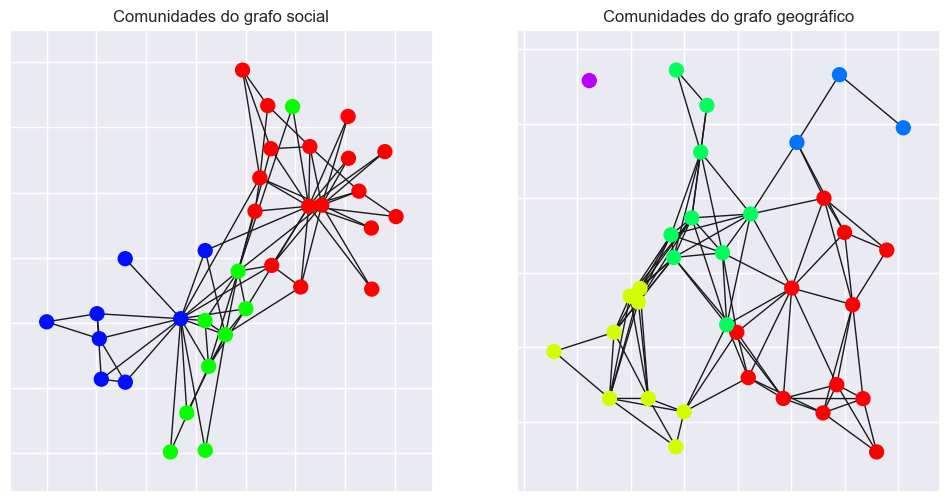

In [44]:
plot_colored_communities(latitude='latitude', longitude='longitude', grafo=grafo_karate, comunities_original=comunidades_karate, 
                         grafo_geo=grafo_geo_karate, comunities_geo=comunidades_geo_karate, use_geolocation=False)

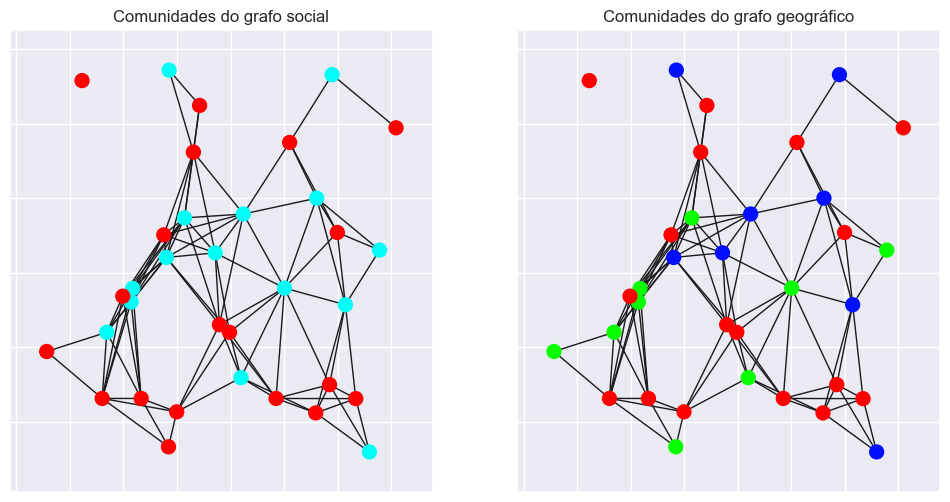

In [45]:
plot_colored_communities(latitude='latitude', longitude='longitude', grafo=grafo_geo_karate, comunities_original=comunidades_karate_05,
                            grafo_geo=grafo_geo_karate, comunities_geo=comunidades_karate_099, use_geolocation=True)

In [46]:
jaccard_matrix = np.zeros((len(comunidades_karate), len(comunidades_geo_karate)))

# Iterate over each pair of communities
for i, com_social in tqdmBasic(enumerate(comunidades_karate), total=len(comunidades_karate)):
    for j, com_geo in enumerate(comunidades_geo_karate):
        jaccard_value = jaccard_similarity(set(com_social), set(com_geo))
        
        jaccard_matrix[i, j] = jaccard_value

100%|██████████| 3/3 [00:00<?, ?it/s]


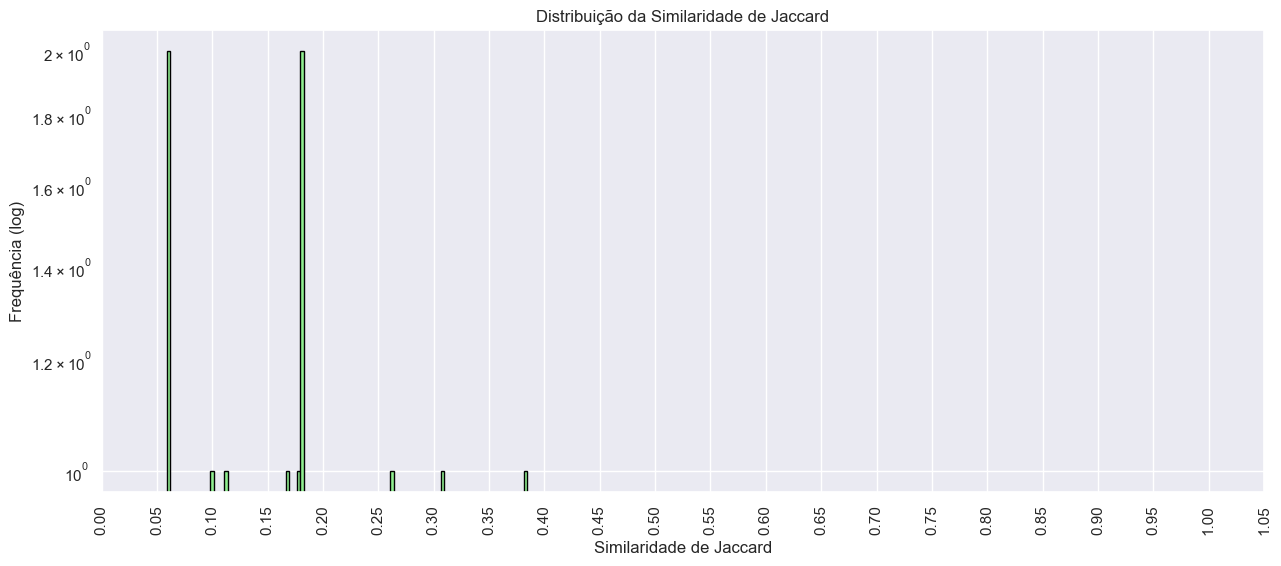

In [47]:
# store the jaccard similarity values different from zero in a list
jaccard_values = jaccard_matrix[jaccard_matrix != 0]

# Plot the histogram of the Jaccard similarity values in logarithmic scale    
plt.figure(figsize=(15, 6))
plt.hist(jaccard_values, bins=100, color='lightgreen', edgecolor='black', log=True)
plt.xlabel('Similaridade de Jaccard')
plt.xticks(np.arange(0, 1.1, 0.05), rotation=90)


plt.ylabel('Frequência (log)')
plt.title('Distribuição da Similaridade de Jaccard')
    
plt.show()

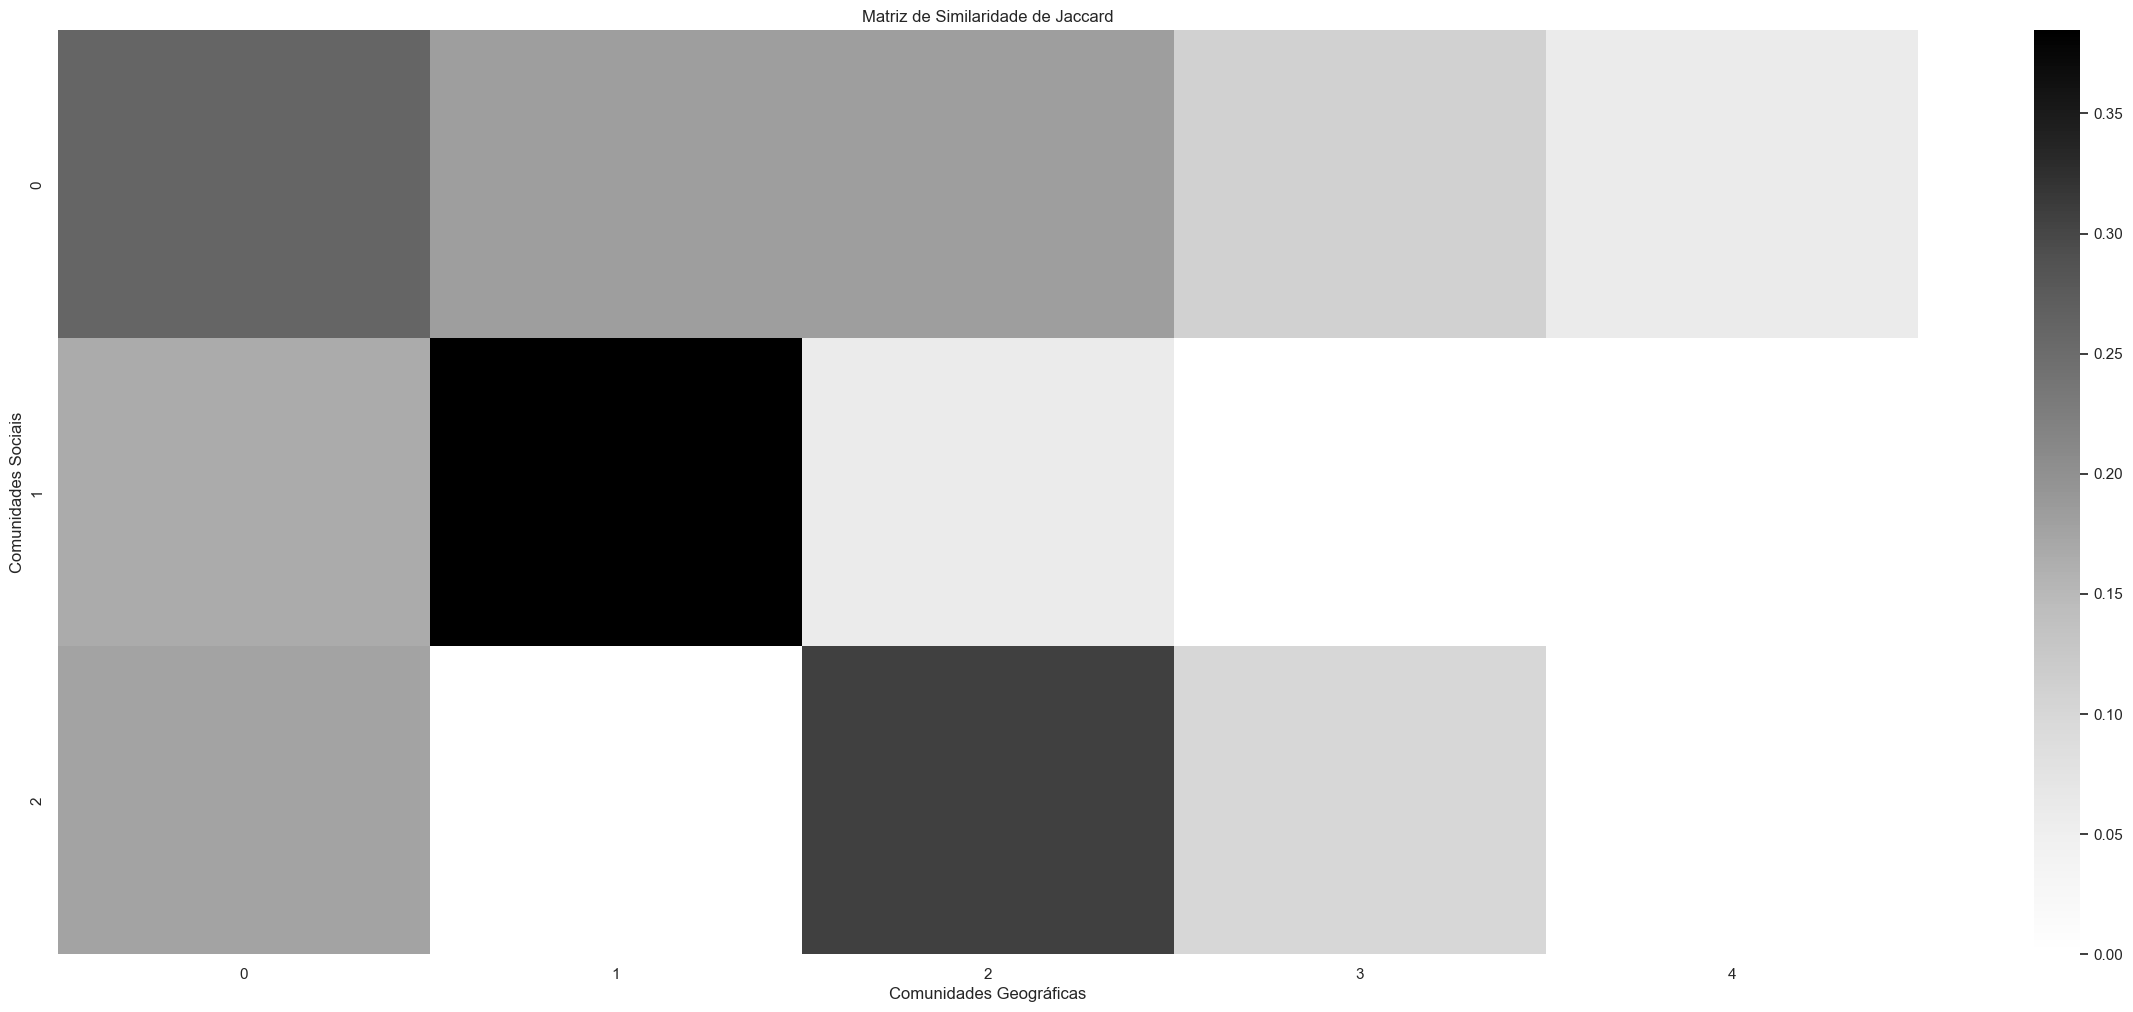

In [48]:
plt.figure(figsize=(30,12))
sns.heatmap(jaccard_matrix, cmap='Greys', xticklabels=range(len(comunidades_geo_karate)), yticklabels=range(len(comunidades_karate)))
plt.xlabel('Comunidades Geográficas')
plt.ylabel('Comunidades Sociais')
plt.title('Matriz de Similaridade de Jaccard')
plt.show()

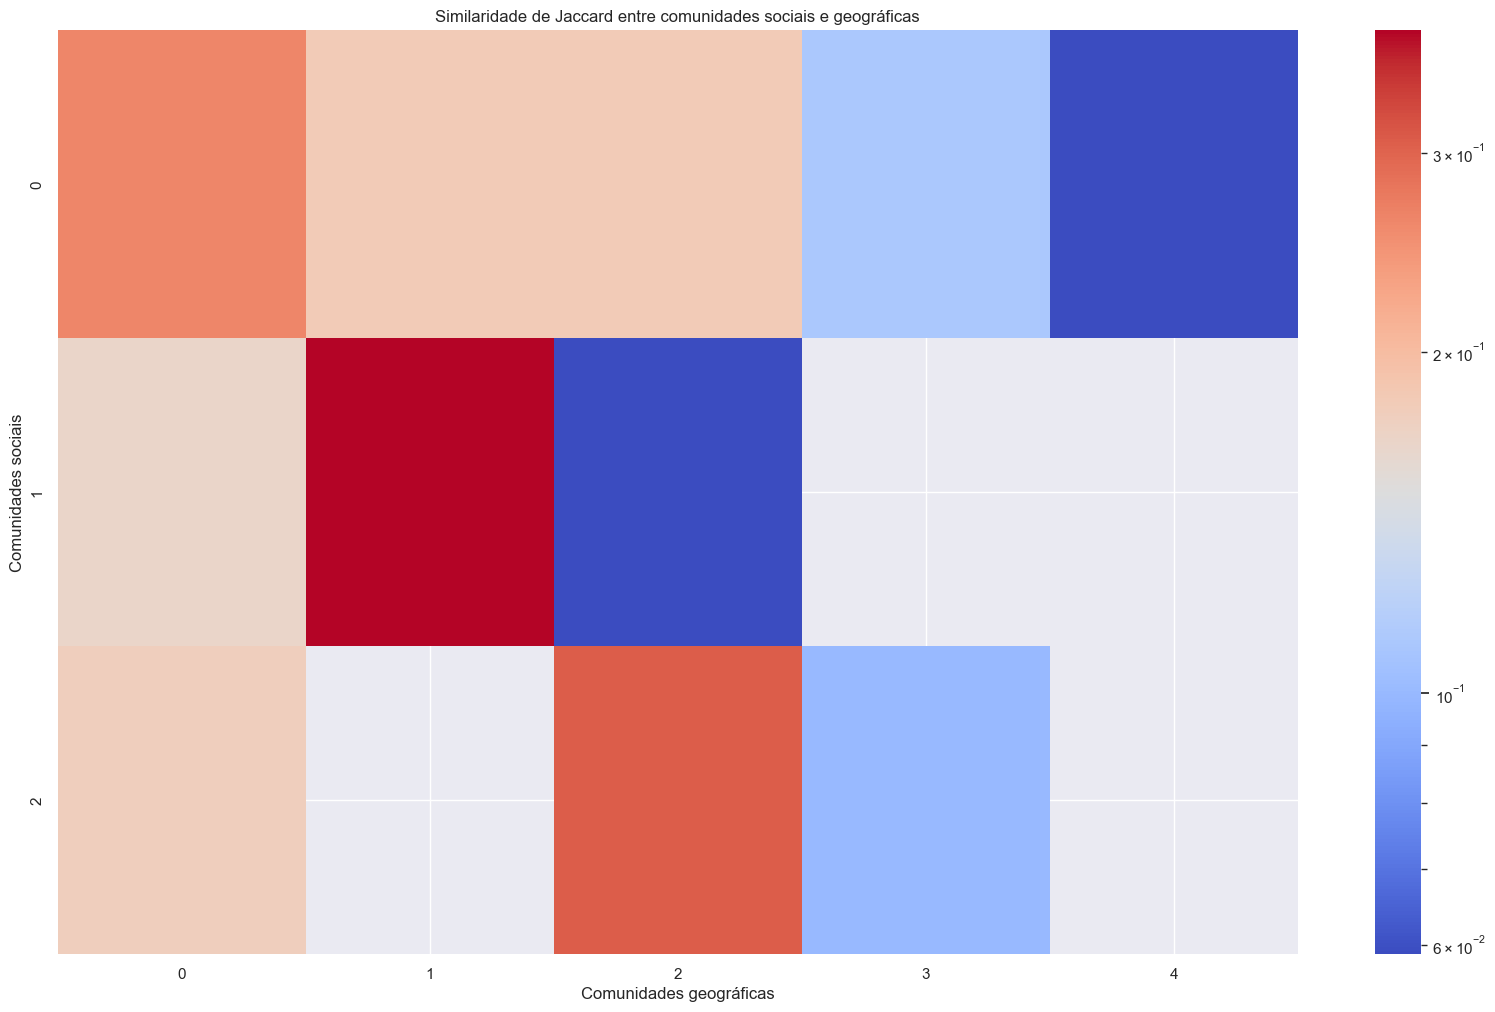

In [49]:
# jaccard matrix heatmap using log scale
plt.figure(figsize=(20, 12))
sns.heatmap(jaccard_matrix, cmap='coolwarm', norm=LogNorm())
plt.xlabel('Comunidades geográficas')
plt.ylabel('Comunidades sociais')
plt.title('Similaridade de Jaccard entre comunidades sociais e geográficas')
plt.show()

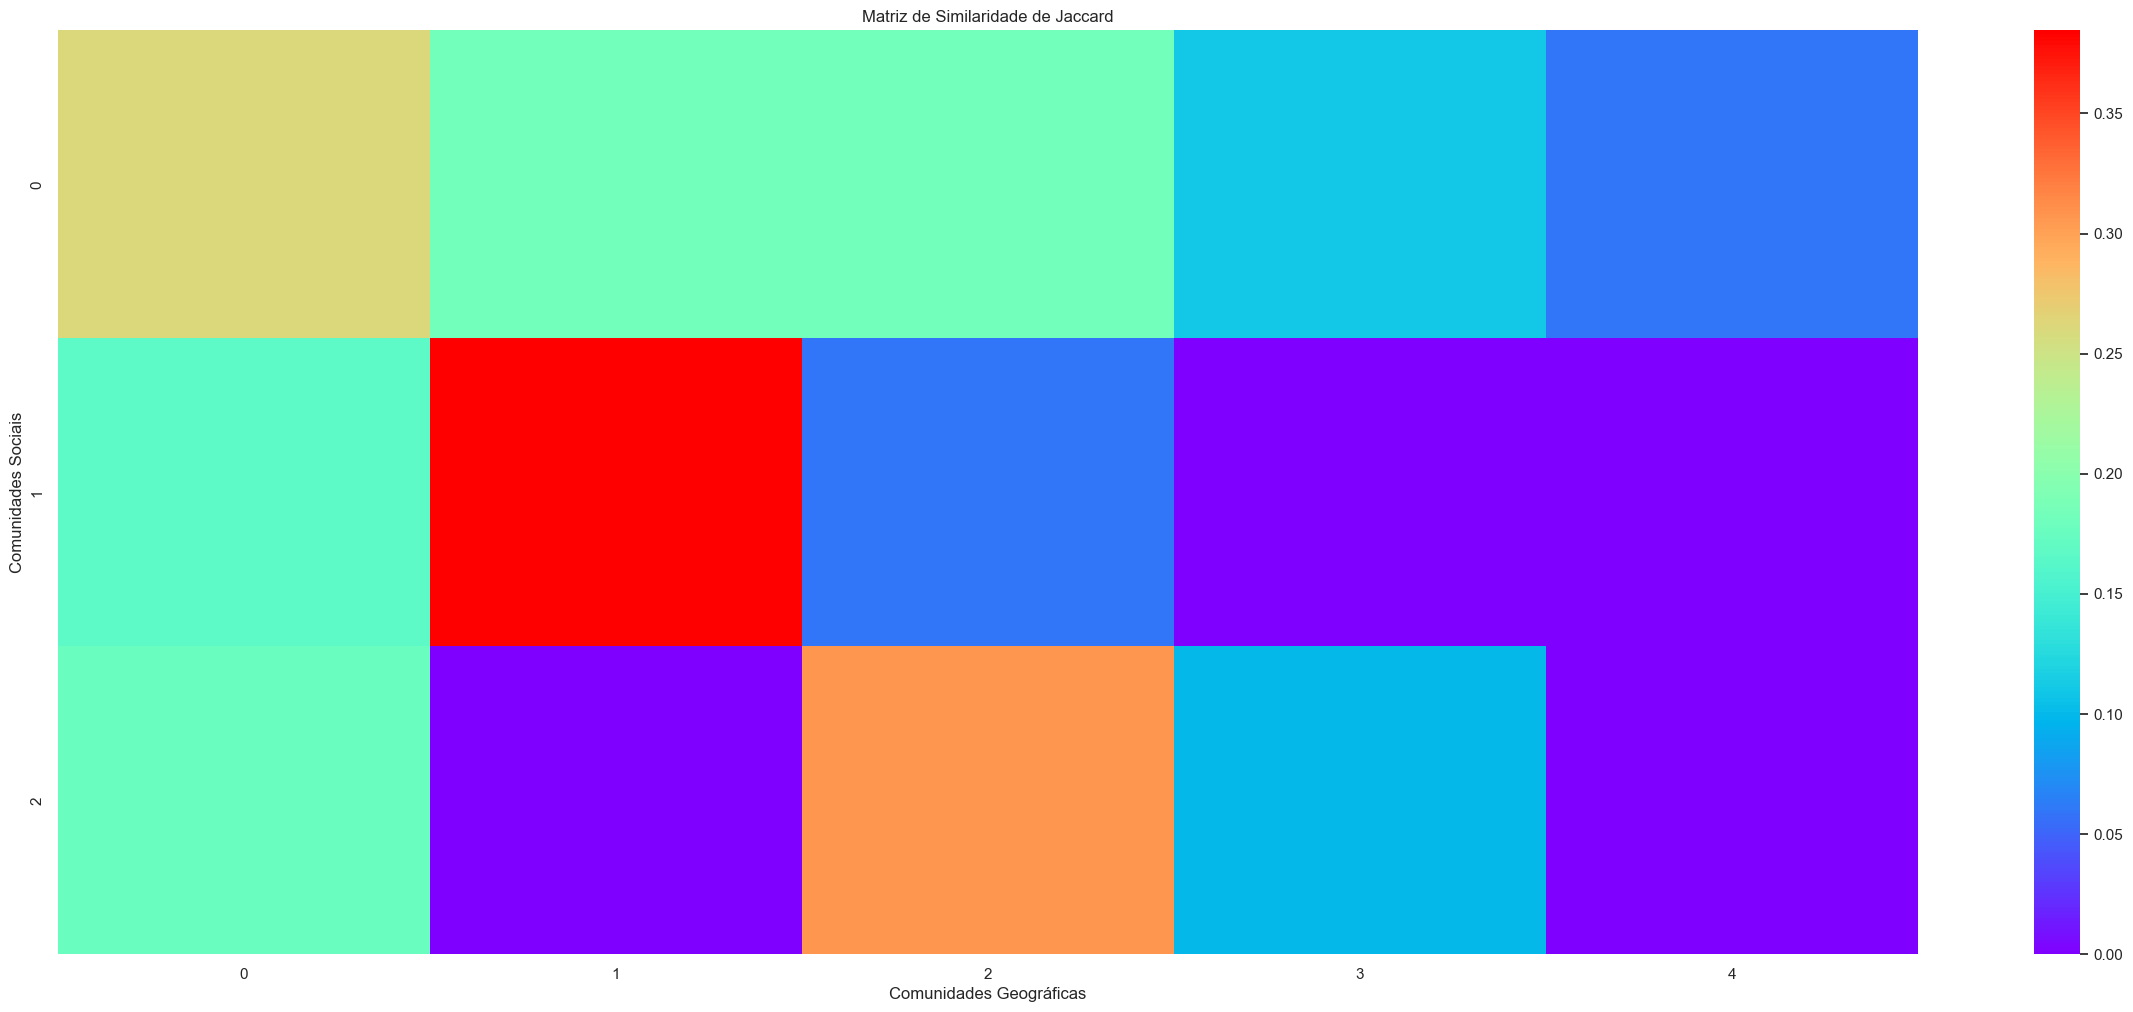

In [50]:
plt.figure(figsize=(30,12))
sns.heatmap(jaccard_matrix, cmap='rainbow', xticklabels=range(len(comunidades_geo_karate)), yticklabels=range(len(comunidades_karate)))
plt.xlabel('Comunidades Geográficas')
plt.ylabel('Comunidades Sociais')
plt.title('Matriz de Similaridade de Jaccard')
plt.show()

In [121]:
all_elements = set().union(*comunidades_karate).union(*comunidades_geo_karate)

In [122]:
labels_true = assign_labels(comunidades_karate, all_elements)
labels_pred = assign_labels(comunidades_geo_karate, all_elements)

ami_score = ami(labels_true, labels_pred)

print(f"Adjusted Mutual Information (AMI) score: {ami_score}")


Adjusted Mutual Information (AMI) score: -0.0051049916298534104


## Visualização Geral

In [ ]:
text_size_axis = 12
text_size_standart = 16

fig, axs = plt.subplots(2, figsize=(15, 15))

fig.suptitle('Comparação de algoritmos de agrupamento', fontsize=text_size_standart)



x = [len(sorted_estatisticas_grafo[key]['x_points']) for key in sorted_estatisticas_grafo.keys()]
y = [sorted_estatisticas_grafo[key]['mean_distance_to_center'] for key in sorted_estatisticas_grafo.keys()]

x2 = [len(sorted_estatisticas_dataframe[key]['x_points']) for key in sorted_estatisticas_dataframe.keys()]
y2 = [sorted_estatisticas_dataframe[key]['mean_distance_to_center'] for key in sorted_estatisticas_dataframe.keys()]

# x2 = [len(sorted_estatisticas_aglomerado[key]['x_points']) for key in sorted_estatisticas_aglomerado.keys()]
# y2 = [sorted_estatisticas_aglomerado[key]['mean_distance_to_center'] for key in sorted_estatisticas_aglomerado.keys()]

# Primeiro gráfico
axs[0].scatter(x, y)
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('Quantidade de nós por comunidade', fontsize=text_size_standart)
axs[0].set_ylabel('Distância média ao centro em metros\nLouvain', fontsize=text_size_standart)
axs[0].tick_params(axis='x', labelsize=text_size_axis)
axs[0].tick_params(axis='y', labelsize=text_size_axis, rotation=90)
axs[0].grid(axis='y', color='black')

# Segundo gráfico
axs[1].scatter(x2, y2)
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('Quantidade de nós por comunidade', fontsize=text_size_standart)
axs[1].set_ylabel('Distância média ao centro em metros\nK Means', fontsize=text_size_standart)
# axs[1].set_title('Dados por comunidade', fontsize=text_size_standart)
axs[1].tick_params(axis='x', labelsize=text_size_axis)
axs[1].tick_params(axis='y', labelsize=text_size_axis, rotation=90)
axs[1].grid(axis='y', color='black')
axs[1].set_ylim(axs[0].get_ylim())

# Terceiro gráfico
# axs[2].scatter(x2, y2)
# axs[2].set_xscale('log')
# axs[2].set_yscale('log')
# axs[2].set_xlabel('Quantidade de nós por comunidade', fontsize=text_size_standart)
# axs[2].set_ylabel('Distância média ao centro em metros\nAglomerativo (Completo)', fontsize=text_size_standart)
# # axs[2].set_title('Dados por comunidade', fontsize=text_size_standart)
# axs[2].tick_params(axis='x', labelsize=text_size_axis)
# axs[2].tick_params(axis='y', labelsize=text_size_axis, rotation=90)
# axs[2].grid(axis='y', color='black')
# axs[2].set_ylim(axs[0].get_ylim())

plt.tight_layout()
plt.show()

In [ ]:
fig2, axs2 = plt.subplots(2, figsize=(100, 100))

text_size_axis = 48
text_size_standart = 52

# Extract the mean and standard deviation from estatisticas
means_louvain = [sorted_estatisticas_grafo[key]['mean_distance_to_center'] for key in sorted_estatisticas_grafo.keys()]
stds_louvain = [sorted_estatisticas_grafo[key]['standard_deviation'] for key in sorted_estatisticas_grafo.keys()]

# Create a list of community names
community_names_louvain = [str(community) for community in sorted_estatisticas_grafo]

means_k_means = [sorted_estatisticas_dataframe[key]['mean_distance_to_center'] for key in sorted_estatisticas_dataframe.keys()]
stds_k_means = [sorted_estatisticas_dataframe[key]['standard_deviation'] for key in sorted_estatisticas_dataframe.keys()]

# Create a list of community names
community_names_k_means = [str(community) for community in sorted_estatisticas_dataframe]

labels_louvain = [label if i % 5 == 0 else '' for i, label in enumerate(community_names_louvain)]
labels_k_means = [label if i % 5 == 0 else '' for i, label in enumerate(community_names_k_means)]


axs2[0].errorbar(community_names_louvain, means_louvain, yerr=stds_louvain, fmt='o', capsize=5, label='Média e Desvio Padrão', ecolor='red', elinewidth=2, capthick=2, markersize=15)

# Set the labels and title
# axs2[0].set_xlabel('Communidade', fontsize=text_size_standart)
axs2[0].set_ylabel('Distância média ao centro em metros', fontsize=text_size_standart)
axs2[0].tick_params(axis='x', labelsize=text_size_axis, rotation=45)
axs2[0].tick_params(axis='y', labelsize=text_size_axis, rotation=90)
axs2[0].set_title('Distância média ao centro por comunidade', fontsize=text_size_standart)
axs2[0].set_xticks(range(len(community_names_louvain)))
axs2[0].set_xticklabels(labels_louvain, rotation=90)
axs2[0].grid(axis='y', color='black')
axs2[0].legend(fontsize=text_size_standart)

# Plot the mean with error bars representing the standard deviation
axs2[1].errorbar(community_names_k_means, means_k_means, yerr=stds_k_means, fmt='o', capsize=5, label='Média e Desvio Padrão', ecolor='red', elinewidth=2, capthick=2, markersize=15)

axs2[1].set_xlabel('Communidade', fontsize=text_size_standart)
axs2[1].set_ylabel('Distância média ao centro em metros', fontsize=text_size_standart)
axs2[1].tick_params(axis='x', labelsize=text_size_axis, rotation=45)
axs2[1].tick_params(axis='y', labelsize=text_size_axis, rotation=90)
axs2[1].set_xticks(range(len(community_names_k_means)))
axs2[1].set_xticklabels(labels_k_means, rotation=90)
# axs2[1].set_title('Distância média ao centro por comunidade', fontsize=text_size_standart)
axs2[1].grid(axis='y', color='black')
axs2[1].legend(fontsize=text_size_standart)
axs2[1].legend(fontsize=text_size_standart)  # Adiciona a legenda

plt.tight_layout()
plt.show()

In [ ]:
df.to_csv('E://df.csv')

In [ ]:
text_size_axis = 12
text_size_standart = 16

# Extract the keys and values from the 'estatisticas' dictionary
x = [len(estatisticas_aglomerado[key]['x_points']) for key in estatisticas_aglomerado.keys()]
y = [estatisticas_aglomerado[key]['mean_distance_to_center'] for key in estatisticas_aglomerado.keys()]

# Plot the values in bars, y-axis in log
plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.yscale('log')
plt.xlabel('Quantidade de nós por comunidade', fontsize=text_size_standart)
plt.ylabel('Distância média ao centro em metros', fontsize=text_size_standart)
plt.title('Dados por comunidade', fontsize=text_size_standart)
plt.xticks(fontsize=text_size_axis)
plt.yticks(fontsize=text_size_axis, rotation=90)
plt.grid(axis='y', color='black')
plt.show()

# Fim

In [ ]:
max_edge_secao = max(grafo_fluxo_secao.edges(data=True), key=lambda x: x[2].get('weight', 0))
max_edge_freguesia = max(grafo_fluxo_freguesia.edges(data=True), key=lambda x: x[2].get('weight', 0))
max_edge_municipio = max(grafo_fluxo_municipio.edges(data=True), key=lambda x: x[2].get('weight', 0))

print(f"Fluxo máximo entre seções: {max_edge_secao[0]} -> {max_edge_secao[1]} com {max_edge_secao[2]['weight']} tweets")
print(f"Fluxo máximo entre freguesias: {max_edge_freguesia[0]} -> {max_edge_freguesia[1]} com {max_edge_freguesia[2]['weight']} tweets")
print(f"Fluxo máximo entre municípios: {max_edge_municipio[0]} -> {max_edge_municipio[1]} com {max_edge_municipio[2]['weight']} tweets")



In [ ]:
nx.write_graphml_lxml(giant_connected_component, "D:\\Documentos\\data_and_code\\all_data_lisbon\\grafo_twitter_giant_connected_component.graphml")

In [ ]:
# Criar a rede do clube de karatê
G = nx.karate_club_graph()

# Gerar coordenadas fictícias
num_nodes = G.number_of_nodes()
latitudes = np.random.uniform(-90, 90, num_nodes)
longitudes = np.random.uniform(-180, 180, num_nodes)

# Atribuir coordenadas como atributos dos nós
for i, node in enumerate(G.nodes):
    G.nodes[node]['latitude'] = latitudes[i]
    G.nodes[node]['longitude'] = longitudes[i]

# Exibir algumas coordenadas
for node in list(G.nodes):
    print(f"Nó {node}: Latitude {G.nodes[node]['latitude']}, Longitude {G.nodes[node]['longitude']}")
